# [Bike Sharing Dataset (Regression)]



## Introduction

<font>
Understanding and processing Bike Sharing Data is paramount for Bike Rental Companies in order to determine trends regaring bike rental count. Specifically understanding the relationship between weather conditions and application  usage context (for instance trends between daily usage or workday usage) with bike rental count is essential. In this project, the Bike Sharing Data will be analyzed: data will be explored, importance of certain features will be tested, and finally multiple ML models which predict the rental count with respect to chosen features will be developed. They will then be compared to each other and the best model will be determined.
</font>

### Problem Definition

<font >
State your problem in technical terms. What is your end goal? How are you going to solve it?

'Bike sharing rental systems’ popularity is on the rise as more and more people are becoming more environmentally aware. As with all mediums of transportation, the bike sharing rental system usage trends are assumed to be correlated with seasonal and environmental settings. Companies need to know which features are more important so that they can act accordingly in different settings. In this project, the effect of environmental info and application context provided in the bike rental dataset will be analyzed and bike rental count will be predicted.
</font>

### Utilized Datasets

<font>
Describe the utilized datasets in detail. Provide the data source (links if possible), number of obervations, data types, display the distributions of various variables and plot figures that helps reader understand what you are dealing with.

This part includes parts of read_me file that was downloaded with the data zip as well.

==========================================
Bike Sharing Dataset
==========================================

Hadi Fanaee-T

Laboratory of Artificial Intelligence and Decision Support (LIAAD), University of Porto
INESC Porto, Campus da FEUP
Rua Dr. Roberto Frias, 378
4200 - 465 Porto, Portugal


=========================================
Background (form Readme)
=========================================

Bike sharing systems are new generation of traditional bike rentals where whole process from membership, rental and return
back has become automatic. Through these systems, user is able to easily rent a bike from a particular position and return
back at another position. Currently, there are about over 500 bike-sharing programs around the world which is composed of
over 500 thousands bicycles. Today, there exists great interest in these systems due to their important role in traffic,
environmental and health issues.

Apart from interesting real world applications of bike sharing systems, the characteristics of data being generated by
these systems make them attractive for the research. Opposed to other transport services such as bus or subway, the duration
of travel, departure and arrival position is explicitly recorded in these systems. This feature turns bike sharing system into
a virtual sensor network that can be used for sensing mobility in the city. Hence, it is expected that most of important
events in the city could be detected via monitoring these data.

=========================================
Data Set (form Readme)
=========================================
Bike-sharing rental process is highly correlated to the environmental and seasonal settings. For instance, weather conditions,
precipitation, day of week, season, hour of the day, etc. can affect the rental behaviors. The core data set is related to
the two-year historical log corresponding to years 2011 and 2012 from Capital Bikeshare system, Washington D.C., USA which is
publicly available in http://capitalbikeshare.com/system-data. We aggregated the data on two hourly and daily basis and then
extracted and added the corresponding weather and seasonal information. Weather information are extracted from http://www.freemeteo.com.


=========================================
Files
=========================================

	- Readme.txt
	- hour.csv : bike sharing counts aggregated on hourly basis. Records: 17379 hours
	- day.csv - bike sharing counts aggregated on daily basis. Records: 731 days


=========================================
Dataset characteristics (from website)
=========================================
Both hour.csv and day.csv have the following fields, except hr which is not available in day.csv.

	- instant: record index
	- dteday : date
	- season : season (1:winter, 2:spring, 3:summer, 4:fall)
	- yr : year (0: 2011, 1:2012)
	- mnth : month ( 1 to 12)
	- hr : hour (0 to 23)
	- holiday : weather day is holiday or not (extracted from http://dchr.dc.gov/page/holiday-schedule)
	- weekday : day of the week
	- workingday : if day is neither weekend nor holiday is 1, otherwise is 0.
	+ weathersit :
		- 1: Clear, Few clouds, Partly cloudy, Partly cloudy
		- 2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist
		- 3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds
		- 4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog
	- temp : Normalized temperature in Celsius. The values are divided to 41 (max)
	- atemp: Normalized feeling temperature in Celsius. The values are divided to 50 (max)
	- hum: Normalized humidity. The values are divided to 100 (max)
	- windspeed: Normalized wind speed. The values are divided to 67 (max)
	- casual: count of casual users
	- registered: count of registered users
	- cnt: count of total rental bikes including both casual and registered


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
from google.colab import drive
drive.mount("./drive")

Drive already mounted at ./drive; to attempt to forcibly remount, call drive.mount("./drive", force_remount=True).


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
import re
from os.path import join

%matplotlib inline

In [ ]:
fname = "hour.csv"
path_prefix = './drive/My Drive/'
df = pd.read_csv(join(path_prefix, fname))
df.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


In [ ]:
df_day = "day.csv"
path_prefix = './drive/My Drive/'
df_day = pd.read_csv(join(path_prefix, fname))
df_day = df_day.drop(['instant'], axis=1)
df_day.head()

,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


In [ ]:
#drop the columns that are not needed (in this case, the instant column)
df = df.drop(['instant'], axis=1)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   dteday      17379 non-null  object 
 1   season      17379 non-null  int64  
 2   yr          17379 non-null  int64  
 3   mnth        17379 non-null  int64  
 4   hr          17379 non-null  int64  
 5   holiday     17379 non-null  int64  
 6   weekday     17379 non-null  int64  
 7   workingday  17379 non-null  int64  
 8   weathersit  17379 non-null  int64  
 9   temp        17379 non-null  float64
 10  atemp       17379 non-null  float64
 11  hum         17379 non-null  float64
 12  windspeed   17379 non-null  float64
 13  casual      17379 non-null  int64  
 14  registered  17379 non-null  int64  
 15  cnt         17379 non-null  int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 2.1+ MB


In [ ]:
df.describe()

,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


In [ ]:
df.shape

(17379, 16)

In [ ]:
df.dtypes

dteday         object
season          int64
yr              int64
mnth            int64
hr              int64
holiday         int64
weekday         int64
workingday      int64
weathersit      int64
temp          float64
atemp         float64
hum           float64
windspeed     float64
casual          int64
registered      int64
cnt             int64
dtype: object

In [ ]:
# It detects NA(missing values), and returns True else it returns False
df.isna()

,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17374,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
17375,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
17376,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
17377,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [ ]:
# It shows the number of NA values in dataset
df.isna().sum()

dteday        0
season        0
yr            0
mnth          0
hr            0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

# Exploratory Data Analysis

In this section we created several tables and graphs to visualize our data and its features more clearly with visualization means such that bar charts, scatter plots, box plots and scatter plots.


1.   Correlation between all features
2.   Correlation between all features and target variable
3.   Relationship between regular and casual users with respect to hour and season
4.   Relationship between regular and casual users with respect to tempature and humidity
5.   Comparison of average cnt in workdays and nonworkdays
6.   Comparison of cnt in workdays and nonworkdays
7.   Comparison of total cnt in workdays and nonworkdays
8.   Correlation between cnt and weekdays represented with box plot and bar plot
9.   Correlation between average cnt and weekdays represented with box plot
10.  Correlation between cnt and each hour in a day represented with box plot and bar plot
11.  Visualization of average cnt for each hour as bar chart and colors are encoded as season
12.  Relationship between the target variable (cnt) and weather features


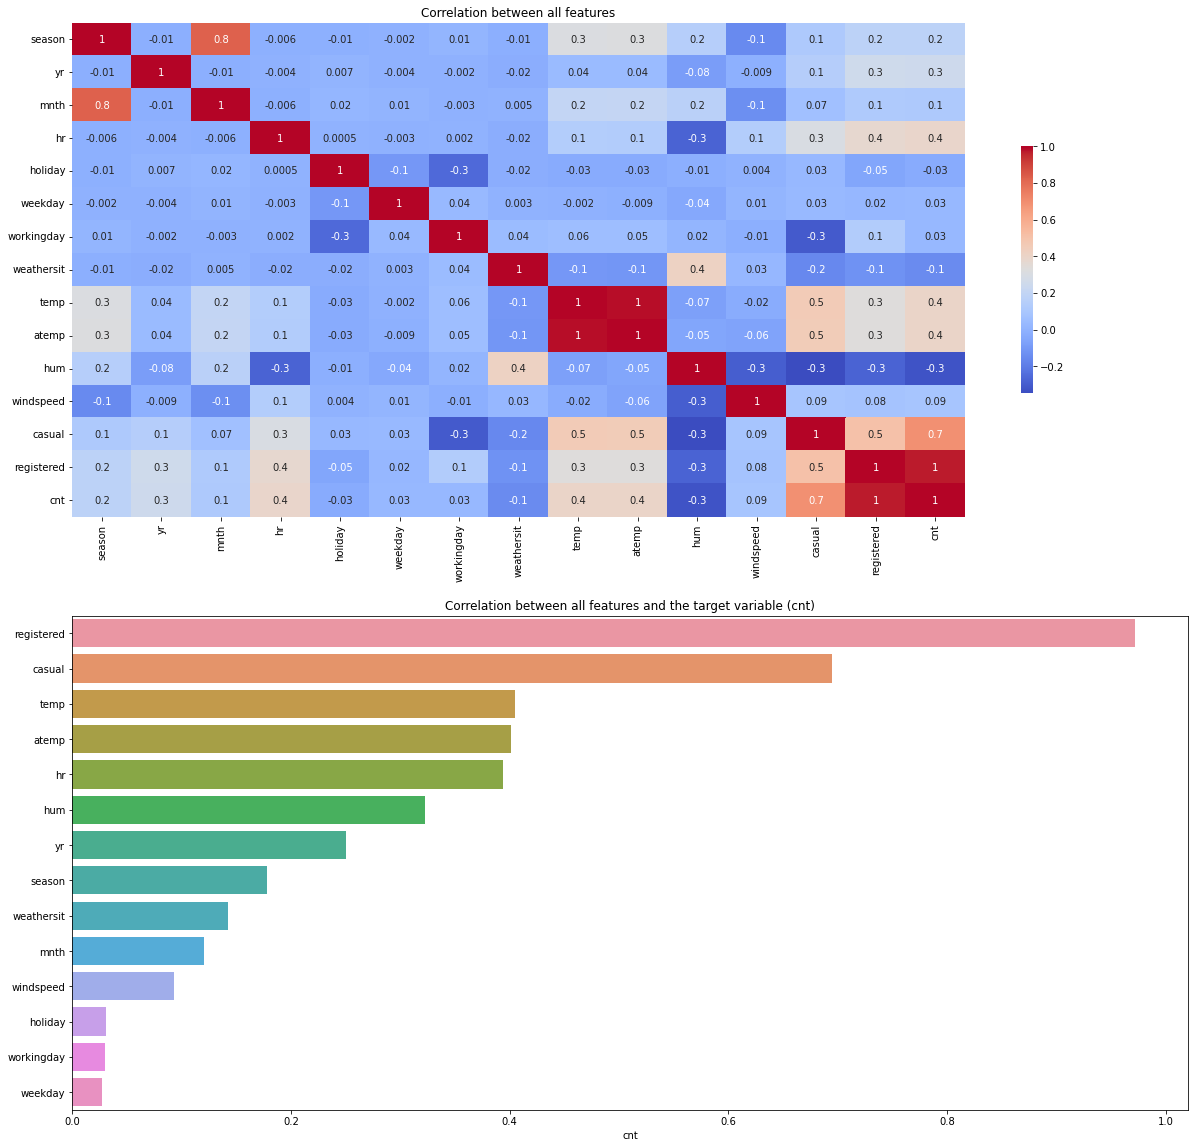

,correlation with rental bike counts
cnt,1.000000
registered,0.972151
casual,0.694564
temp,0.404772
atemp,0.400929
hr,0.394071
yr,0.250495
season,0.178056
mnth,0.120638
windspeed,0.093234


In [ ]:
#@title
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(20,20))
sns.heatmap(df.corr(), annot=True, fmt='.1g', cmap='coolwarm', cbar_kws={'shrink': 0.5}, ax=ax1)
ax1.set_xticklabels(ax1.get_xticklabels(), rotation=90)
ax1.set_yticklabels(ax1.get_yticklabels(), rotation=0)
ax1.set_title('Correlation between all features')

sns.barplot(x=df.corr().abs()['cnt'].sort_values(ascending=False).drop('cnt'), y=df.corr().abs()['cnt'].sort_values(ascending=False).index.drop('cnt'), ax=ax2)
ax2.set_title('Correlation between all features and the target variable (cnt)')


plt.show()

df.corr()['cnt'].sort_values(ascending=False).to_frame().rename(columns = {'cnt': 'correlation with rental bike counts'})



For x many cnt, how many are registered and how many are casual.



*   The heatmap indicates the correlation between all features with each other, rate range between -0.3 to 1(not precise) which represents the lowest and highest correlation. In addition, the color spectrum is between blue and red. According to the heat map red color demonstrates the highest correlation rate which is 1. The correlation rate decreases from red to blue and cells with dark blue are the ones with the least correlation rate which is -0.3. According to the heat map there is a strong correlation between a month and season features. The lowest correlation rate (-0.3) can be observed between humidity and the count of rental bikes by casual/registered users. In addition, humidity and windspeed have the lowest correlation rate, too.

*  The bar plot represents correlation between all features and the target value which specified by us, as total count of rental bikes including both registered and casual users. According to bar plot, the correlation rate between registered users and total count is highest so we can easily say that majority of the count is registered users. In addition, correlation rate between weekday and the total count seems to be lowest. Thus, we can deduce that the relationship between the days of the week and the bike rental count is weak.

*  In addition to the bar plot above, the relationship between holiday, weather situations and humidity with the total count can be seen in the table. It is seen that the relationship rates are negative. Thus, it can be said that the number of people who rent bikes has less significancy with features such as holidays, weather or humidity, and they are not very correlated as much as the temperature, hour or year features.



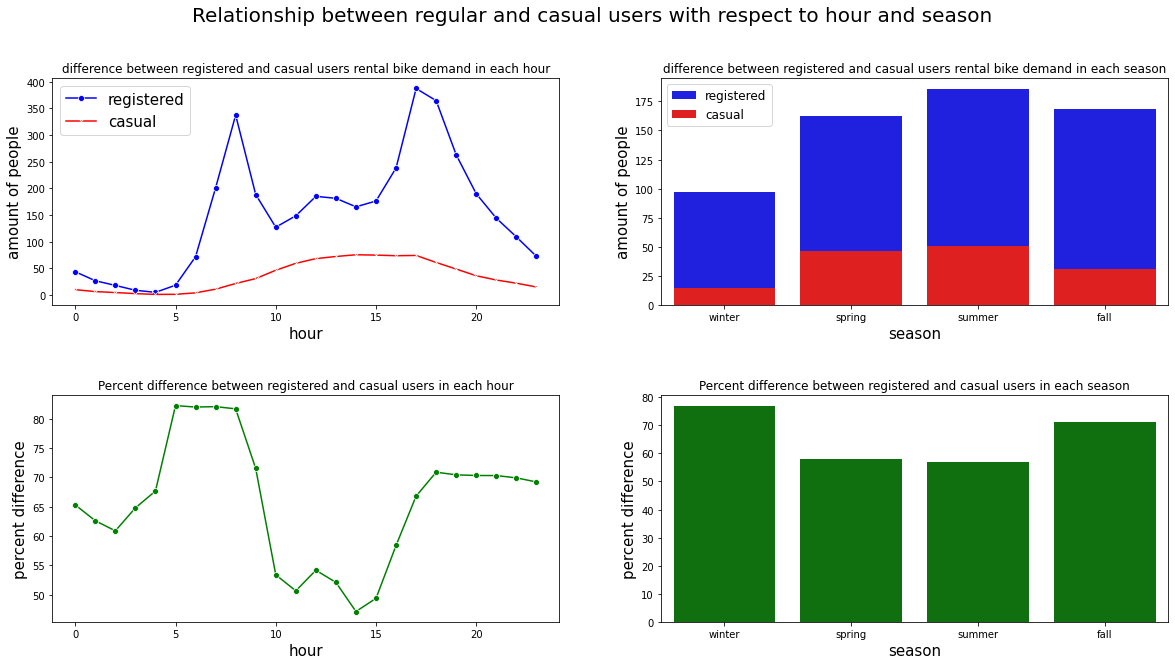

In [ ]:
#@title
fig, axs = plt.subplots(2, 2, figsize=(20,10))
sns.lineplot(x=df['hr'], y=df['registered'], color='blue', marker = 'o', ax=axs[0,0],ci = None)
sns.lineplot(x=df['hr'], y=df['casual'], color='red', marker = 'x', ax=axs[0,0],ci = None)
axs[0,0].set_ylabel('amount of people', fontsize=15)
axs[0,0].set_xlabel('hour', fontsize=15)
axs[0,0].set_title('difference between registered and casual users rental bike demand in each hour')
axs[0,0].legend(['registered', 'casual'], fontsize=15)
sns.barplot(x=df['season'], y=(df['registered']), color='blue', ax=axs[0,1], ci = None)
sns.barplot(x=df['season'], y=(df['casual']), color='red', ax=axs[0,1],ci = None)
axs[0,1].set_ylabel('amount of people', fontsize=15)
axs[0,1].set_xlabel('season', fontsize=15)
axs[0,1].set_title('difference between registered and casual users rental bike demand in each season')
axs[0,1].set_xticklabels(['winter', 'spring', 'summer', 'fall'])
axs[0,1].legend(['registered', 'casual'], fontsize=12)
sns.lineplot(x=df['hr'], y=(df['registered'] - df['casual']) / df['cnt'] * 100, color='green', marker = 'o', ax=axs[1,0], ci= None)
axs[1,0].set_ylabel('percent difference', fontsize=15)
axs[1,0].set_xlabel('hour', fontsize=15)
axs[1,0].set_title('Percent difference between registered and casual users in each hour')
sns.barplot(x=df['season'], y=(df['registered'] - df['casual']) / df['cnt'] * 100, color='green', ax=axs[1,1], ci = None)
axs[1 ,1].set_ylabel('percent difference', fontsize=15)
axs[1,1].set_xlabel('season', fontsize=15)
axs[1,1].set_title('Percent difference between registered and casual users in each season')
axs[1,1].set_xticklabels(['winter', 'spring', 'summer', 'fall'])
fig.suptitle('Relationship between regular and casual users with respect to hour and season', fontsize = 20)
#season tempereature ve hour diye ayrılabilir burası
plt.subplots_adjust(hspace=0.4)
plt.show()



*   In the graph of “difference between registered and casual users rental bike demand in each hour”, number of registered users is higher than the casual users. As seen in the graph, the number of the registered users increases significantly between 6 and 9 am. We can associate this increase with the commuting times and interpret as most of these registered users are working people or students going to school. Likewise, the number of registered users increases between 5 and 7 pm. We can associate this with the rush hours or returning from school hours. Finally, we interpret the graph as majority of registered users are employees or students who follow a routine. When we look at casual users’ relation with hour, the number of casual users increases from 9 am to 6 pm. However, due to the increasing number of users during working hours or school hours, we can say that most of these users are not working and not students. It can also be interpreted that most of these casual users might be tourists. Also, the percent differences between registered and casual users increase up to 80 percent in the commuting times in between 6am to 9 am. On the contrary, in the rush hours the percent difference between registered and casual users are less than 80 percent since the number of casual users in that time interval is high than usual according to number difference and hour graph.
*  In the graph of “difference between registered and casual users rental bike demand in each season”, we can easily say that relationship between summer and number of registered/casual users is higher than the other seasons. We infer as summer is more suitable season for renting bike which gives is reason to believe that users prefer warmer climates. Also, the difference between the number of registered and casual users is negligible in summer and spring based on percent difference bar plot. When we look at winter, registered users count is moderately low compared to other season’s count. Yet, the number of casual users is reduced in winter too. Thus, registered users prefer other transportation mediums in cold climates. Especially, the percent difference between registered and casual users in winter is significantly high. Therefore, casual users like tourists do not engage with bikes in such weather compared to other seasons.



In [ ]:
#@title
df.groupby('season')['cnt'].mean()

season
1    111.114569
2    208.344069
3    236.016237
4    198.868856
Name: cnt, dtype: float64

As seen here, while total counts makes it seem like on workingdays there are more bike rentals, this is not due to the fact that more people rent bikes on workdays but rather because there are more workdays in the year, so in order to determine whether workdays are an important factor in predicting rental counts we will analyze the means.

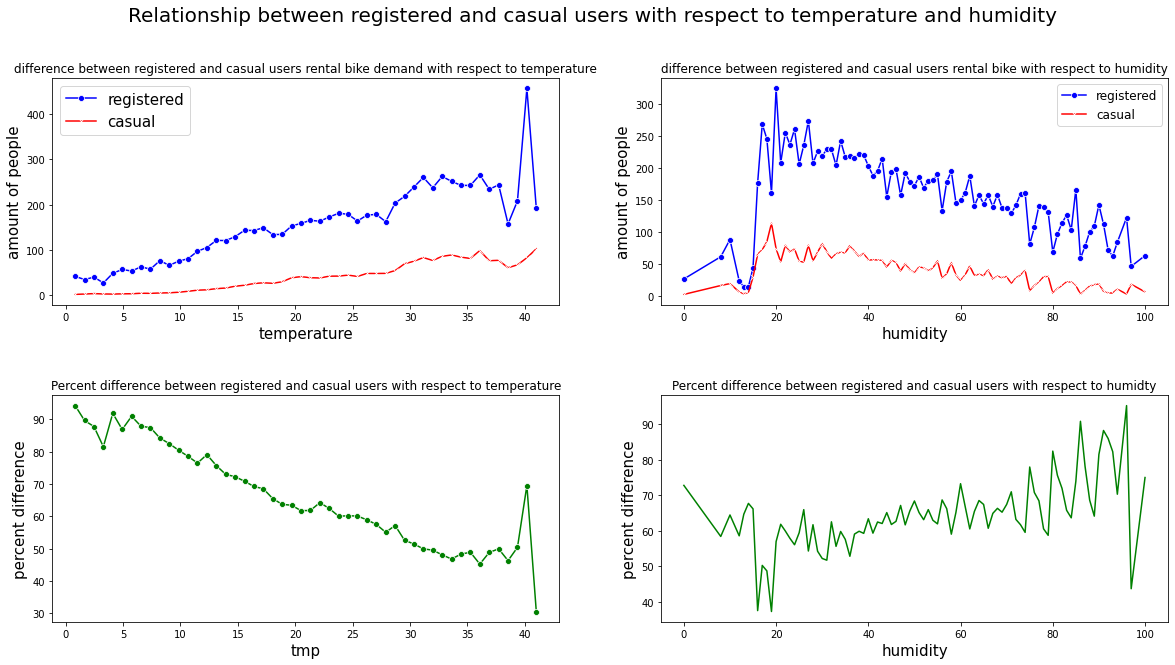

In [ ]:
#@title
fig, axs = plt.subplots(2, 2, figsize=(20,10))
sns.lineplot(x=df['temp']*41, y=df['registered'], color='blue', marker = 'o', ax=axs[0,0],ci = None)
sns.lineplot(x=df['temp']*41, y=df['casual'], color='red', marker = 'x', ax=axs[0,0],ci = None)
axs[0,0].set_ylabel('amount of people', fontsize=15)
axs[0,0].set_xlabel('temperature', fontsize=15)
axs[0,0].set_title('difference between registered and casual users rental bike demand with respect to temperature')
axs[0,0].legend(['registered', 'casual'], fontsize=15)
sns.lineplot(x=df['hum']*100, y=(df['registered']), color='blue', marker= 'o', ax=axs[0,1], ci = None)
sns.lineplot(x=df['hum']*100, y=(df['casual']), color='red', marker = 'x', ax=axs[0,1],ci = None)
axs[0,1].set_ylabel('amount of people', fontsize=15)
axs[0,1].set_xlabel('humidity', fontsize=15)
axs[0,1].set_title('difference between registered and casual users rental bike with respect to humidity')
#axs[0,1].set_xticklabels(['spring', 'summer', 'fall', 'winter'])
axs[0,1].legend(['registered', 'casual'], fontsize=12)
sns.lineplot(x=df['temp']*41, y=(df['registered'] - df['casual']) / df['cnt'] * 100, color='green', marker = 'o', ax=axs[1,0], ci= None)
axs[1,0].set_ylabel('percent difference', fontsize=15)
axs[1,0].set_xlabel('tmp', fontsize=15)
axs[1,0].set_title('Percent difference between registered and casual users with respect to temperature')
sns.lineplot(x=df['hum']*100, y=(df['registered'] - df['casual']) / df['cnt'] * 100, color='green', ax=axs[1,1], ci = None)
axs[1 ,1].set_ylabel('percent difference', fontsize=15)
axs[1,1].set_xlabel('humidity', fontsize=15)
axs[1,1].set_title('Percent difference between registered and casual users with respect to humidty')
#axs[1,1].set_xticklabels(['spring', 'summer', 'fall', 'winter'])
fig.suptitle('Relationship between registered and casual users with respect to temperature and humidity', fontsize = 20)
#season tempereature ve hour diye ayrılabilir burası
plt.subplots_adjust(hspace=0.4)
plt.show()




*   The number of registered and casual users increases proportionally as the temperature rises. Both the number if users show a higher increase between 30 and 35 Celsius values. As we saw in the previous season graph people tend to rent bike when climate is warmer, same result is applicable in this graph, too. Differently, we observed that the temperature at which the number of registered users increases the most, reaches the highest values when it is close to the maximum temperature, which is a slightly different result than we expected. Nonetheless, we can’t observe same drastic change in casual users and temperature correlation. As we can see, percent difference graph, the percent difference in the number of registered and casual users decreases as the temperature increases, but when the temperature reached its maximum value, the percent difference increases as the number of registered users increases; as seen in the previous graph.
*   In the graph of ”difference between registered and casual users with respect to humidity”, when humidity increases the number of registered and casual users increases until sudden point between 0-20 humidity then drastically both count decreases.  After this decline, registered and casual user count increase and reaches their peak values. Thereafter, as the humidity increases both casual and registered bike rental counts decrease which is expected. The percent difference between casual and registered  users with respect to humidity is least when they reach their peak values. Finally, we can say that people prefer favorable humidity and it helps in increasing the number of bikes rented.





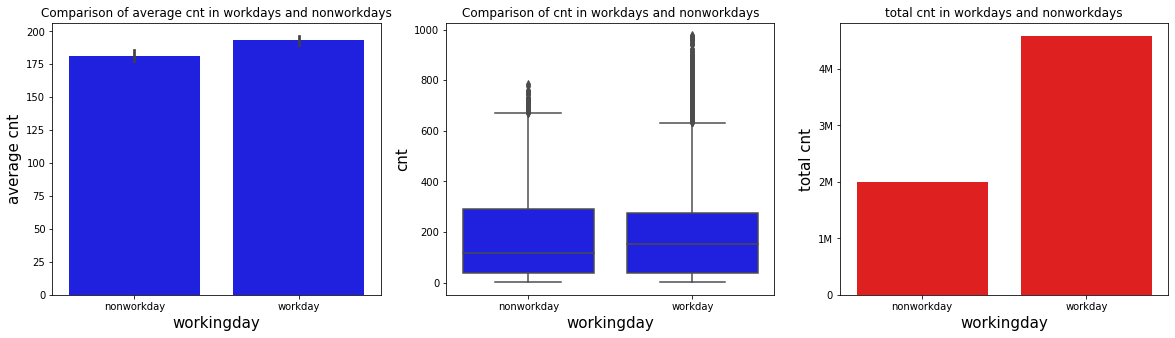

workingday,false,true
total cnt,1000269.0,2292410.0
average cnt,181.4,193.2


In [ ]:
#@title
fig, axs = plt.subplots(1, 3, figsize=(20,5))
sns.barplot(x=df['workingday'], y=df['cnt'], color='blue', ax=axs[0])
axs[0].set_title('Comparison of average cnt in workdays and nonworkdays')
axs[0].set_ylabel('average cnt', fontsize=15)
axs[0].set_xlabel('workingday', fontsize=15)
axs[0].set_xticklabels(['nonworkday', 'workday'])


sns.boxplot(x=df['workingday'], y=df['cnt'], color='blue', ax=axs[1])
axs[1].set_ylabel('cnt', fontsize=15)
axs[1].set_xlabel('workingday', fontsize=15)
axs[1].set_xticklabels(['nonworkday', 'workday'])
axs[1].set_title('Comparison of cnt in workdays and nonworkdays')


workday_count = df[df['workingday'] == 1]['cnt'].sum()
nonworkday_count = df[df['workingday'] == 0]['cnt'].sum()

sns.barplot(x=['nonworkday', 'workday'], y=[nonworkday_count, workday_count], color='red', ax=axs[2])
axs[2].set_title('total cnt in workdays and nonworkdays')
axs[2].set_ylabel('total cnt', fontsize=15)
axs[2].set_xlabel('workingday', fontsize=15)
axs[2].set_xticklabels(['nonworkday', 'workday'])
axs[2].set_yticklabels(['0', '1M', '2M', '3M', '4M', '5M', '6M', '7M', '8M', '9M', '10M'])

plt.show()


#get whiskers of boxplot
whiskers = df.groupby('workingday')['cnt'].quantile([0.25, 0.75]).values
#get values outside of whiskers
outliers = df[(df['cnt'] > whiskers[0]) | (df['cnt'] > whiskers[1])]
#count and print amount of outliers, 0 is nonworkday, 1 is workday in a frame, make 0 "false", 1 "true", make workingday "day"
outliers.groupby('workingday')['cnt'].count().to_frame().rename(columns={'cnt': 'amount of outliers', 'workingday': 'day'}).rename(index={0: 'false', 1: 'true', "workingday" : "day"}).T


frame_info = pd.concat([df.groupby('workingday')['cnt'].sum().to_frame().rename(columns={'cnt': 'total cnt', 'workingday': 'day'}).rename(index={0: 'false', 1: 'true', "workingday" : "day"}).T, df.groupby('workingday')['cnt'].mean().to_frame().rename(columns={'cnt': 'average cnt', 'workingday': 'day'}).rename(index={0: 'false', 1: 'true', "workingday" : "day"}).T])

frame_info = frame_info.applymap(lambda x: f'{x:.1f}')
display(frame_info)



*   The first graph which is comparison of average count in workdays and non-workdays indicates that number of rented bikes is higher in working days rather than on the non-working day. This can be interpreted as most of the riders might be employees or students who have routines. The average count on workdays is declared as 193.2 and on non-workdays, it is calculated as 181.4.
*   The second graph is a box plot that represents the comparison between the total count of rented bikes and working/non-working days.

* The third graph represents the total count of rented bikes on working days and non-working days. The total count of rented bikes on a working day is higher than non-working days which is expected. Most of the registered users ride bikes on the working days which is predictable since the majority of registered users have routines on weekdays. In addition, the reason why for difference in between the number of rented bikes on workday and non-workday is originated from the number of days in both category.



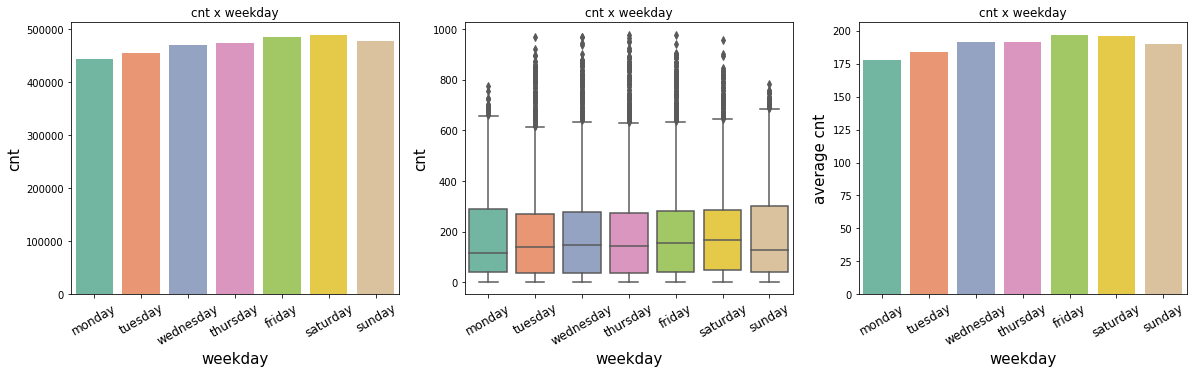

In [ ]:
#@title
weekday_cnt = df.groupby('weekday')['cnt'].sum()




fig, axs = plt.subplots(1, 3, figsize=(20,5))
sns.barplot(x=weekday_cnt.index, y=weekday_cnt.values, palette='Set2' , ax = axs[0])
axs[0].set_ylabel('cnt', fontsize=15)
axs[0].set_xlabel('weekday', fontsize=15)
axs[0].set_title('cnt x weekday')
axs[0].set_xticks([0,1,2,3,4,5,6])
axs[0].set_xticklabels(['monday', 'tuesday', 'wednesday', 'thursday', 'friday', 'saturday', 'sunday'], rotation = 30, fontsize = 12)





sns.boxplot(x=df['weekday'], y=df['cnt'], palette='Set2', ax = axs[1])
axs[1].set_ylabel('cnt', fontsize=15)
axs[1].set_xlabel('weekday', fontsize=15)
axs[1].set_title('cnt x weekday')
axs[1].set_xticks([0,1,2,3,4,5,6])
axs[1].set_xticklabels(['monday', 'tuesday', 'wednesday', 'thursday', 'friday', 'saturday', 'sunday'], rotation = 30, fontsize = 12)


sns.barplot(x=df['weekday'], y=df['cnt'], palette='Set2', ax = axs[2], ci = None)
axs[2].set_ylabel('average cnt', fontsize=15)
axs[2].set_xlabel('weekday', fontsize=15)
axs[2].set_title('cnt x weekday')
axs[2].set_xticks([0,1,2,3,4,5,6])
axs[2].set_xticklabels(['monday', 'tuesday', 'wednesday', 'thursday', 'friday', 'saturday', 'sunday'], rotation = 30, fontsize = 12)
plt.show()



*   The first bar plot shows the total number of bikes rented on each day of the week. The highest count is observed on Saturday. The second place belongs to Friday and the third is Sunday. Thus, we can interpret this result as most of the bike users choose to ride a bike when they are on weekend.
*   The second graph is a box plot that represents the correlation between the count of rented bikes and each day in a week.


* The third graph shows the relationship between the average count of rented bikes and each day of the week. The highest count is observed on Friday, then Saturday. However, this is not the result that we expected since as can be seen in the first graph highest total count of rented bikes is seen on Saturday. On workdays, the average count increases from Monday to Wednesday and stays almost the same on Thursday. Friday and Saturday have higher counts than other days, and Sunday’s count is close to count on Thursday.






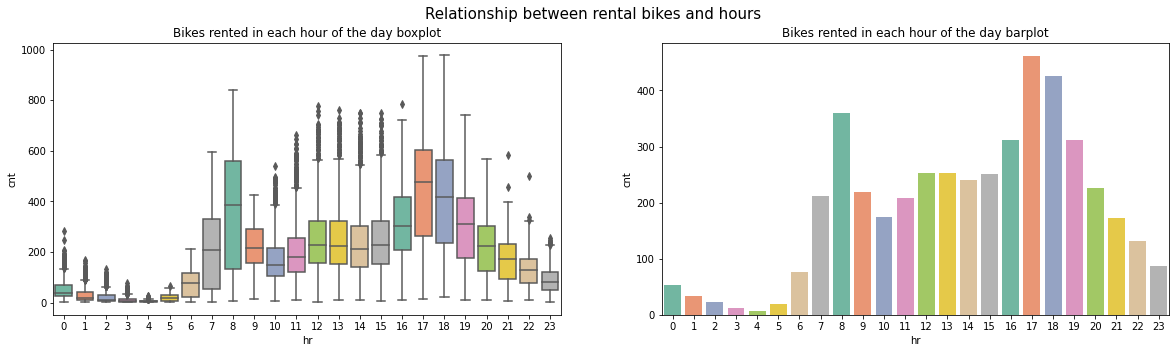

In [ ]:
#@title
fig, axs = plt.subplots(1, 2, figsize=(20,5))
sns.boxplot(x=df['hr'], y=df['cnt'], ax=axs[0], palette = 'Set2')
axs[0].set_title('Bikes rented in each hour of the day boxplot')
sns.barplot(x=df['hr'], y=df['cnt'], ax=axs[1],ci = None, palette = 'Set2')
axs[1].set_title('Bikes rented in each hour of the day barplot')
fig.suptitle('Relationship between rental bikes and hours', fontsize = 15)
#season tempereature ve hour diye ayrılabilir burası
plt.subplots_adjust(hspace=0.5)
plt.show()




*   The first box plot represents correlation between average count of bikes rented and hours of the day. The second graph represents same correlation with different type of graph which is a bar plot. As we can see on the box plot and bar plot, the highest average of rented bikes is on 5 pm. We can interpret this increase as rush hour. In addition, when we look at morning hours between slot of 4 am to 10 am higher count can be observed on 8 am which is common time to go to the work/school. As we predict, after 7 pm the count decreases until 4 am since people prefer to engage more with bikes in time slot between 7 am to 7.




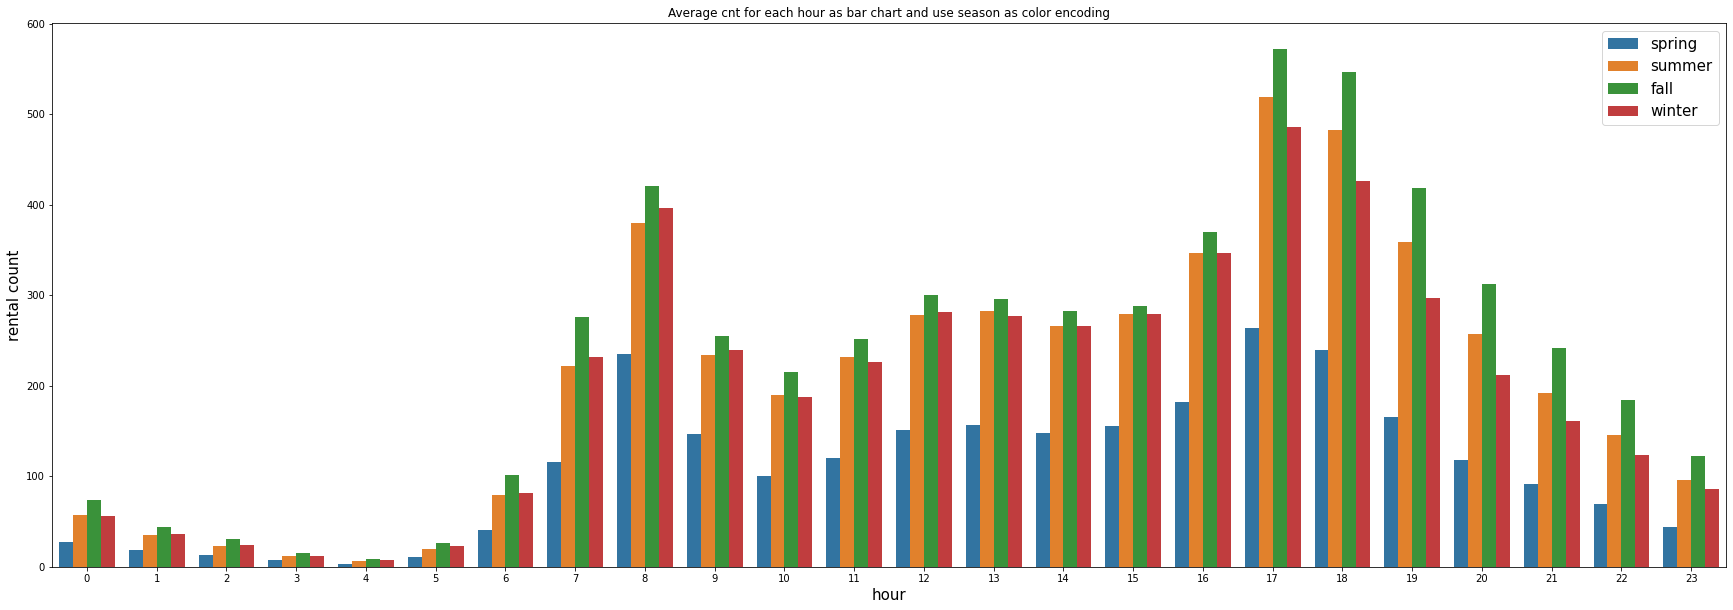

In [ ]:
#@title
plt.figure(figsize=(30,10))
sns.barplot(x=df['hr'], y=df['cnt'], ci = None, hue=df['season'])
plt.xlabel('hour',fontsize = 15)
plt.ylabel('rental count', fontsize = 15)
plt.legend(loc='upper right', labels=['spring', 'summer', 'fall', 'winter'], fontsize = 15)
plt.title('Average cnt for each hour as bar chart and use season as color encoding')
plt.show()



*   The data is visualized using a bar chart with 4 catagories. Count data is displayed for every hour of the day and for every hour 4 hues are used for indicating the average count values for each season.




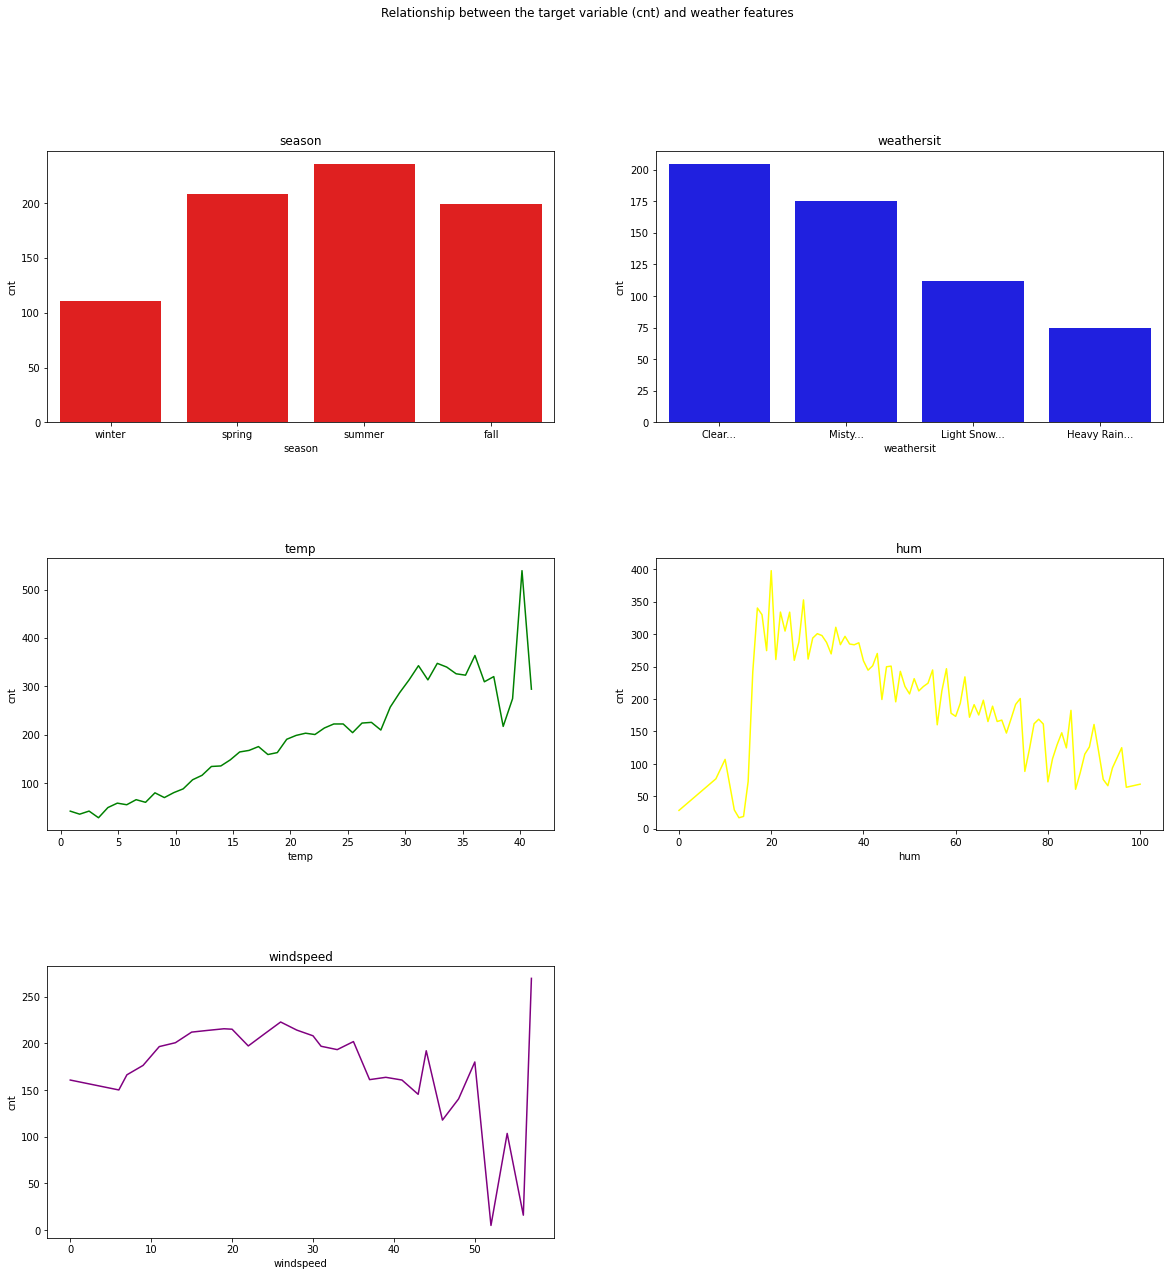

In [ ]:
#@title
fig, axs = plt.subplots(3, 2, figsize=(20,20))
sns.barplot(x=df['season'], y=df['cnt'], ax=axs[0,0], ci = None,color='red')
axs[0,0].set_title('season')
axs[0,0].set_xticklabels(['winter', 'spring', 'summer', 'fall'])

sns.barplot(x=df['weathersit'], y=df['cnt'], ax=axs[0,1], ci = None,color='blue')
axs[0,1].set_title('weathersit')
axs[0,1].set_xticklabels(['Clear...', 'Misty...', 'Light Snow...', 'Heavy Rain...'])

#axs[0.1].set_xticklabels(['Clear...', 'Misty...', 'Light Snow...', 'Heavy Rain...'])
sns.lineplot(x=df['temp'] * 41, y=df['cnt'], ax=axs[1,0], ci = None,color='green')
axs[1,0].set_title('temp')
sns.lineplot(x=df['hum'] * 100, y=df['cnt'], ax=axs[1,1], ci = None,color='yellow')
axs[1,1].set_title('hum')
sns.lineplot(x=df['windspeed'] * 67, y=df['cnt'], ax=axs[2,0], ci = None, color='purple')
axs[2,0].set_title('windspeed')

axs[2,1].axis('off')

fig.suptitle('Relationship between the target variable (cnt) and weather features')
plt.subplots_adjust(hspace=0.5)




*  To display how count value changes with weather features we first used two bar charts. First chart was used to show the average count value for each season and the second one to show the average count values for each weather situation. Secondly we used three linecharts for more numerical weather features: temperature, humidity and wind speed are displayed with their count values in each linechart.




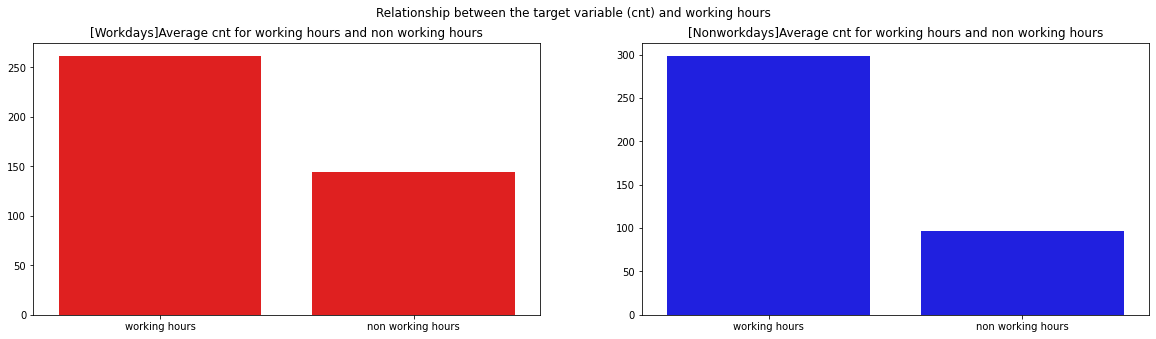

In [ ]:
#@title

fig, axs = plt.subplots(1, 2, figsize=(20,5))
sns.barplot(x=['working hours', 'non working hours'], y=[df[(df['hr'] >= 8) & (df['hr'] <= 17) & (df['workingday'] == 1)]['cnt'].mean(), df[ ( (df['hr'] < 8) | (df['hr'] > 17) ) & (df['workingday'] == 1)]['cnt'].mean()], ax=axs[0], ci = None, color='red')
axs[0].set_title('[Workdays]Average cnt for working hours and non working hours')
sns.barplot(x=['working hours', 'non working hours'], y=[df[(df['hr'] >= 8) & (df['hr'] <= 17) & (df['workingday'] == 0)]['cnt'].mean(), df[ ( (df['hr'] < 8) | (df['hr'] > 17) ) & (df['workingday'] == 0)]['cnt'].mean()], ax=axs[1], ci = None, color='blue')
axs[1].set_title('[Nonworkdays]Average cnt for working hours and non working hours')
fig.suptitle('Relationship between the target variable (cnt) and working hours')
plt.subplots_adjust(hspace=0.5)
plt.show()






*   First part we see the bar plot of average count for working hours and non-working hours in workdays.
*   Second part there is similarbar plot which represents average count for working hours and non-working hours in weekend.


*  Comparing these two graph: firstly, in the second graph the count for working hours higher than working hours on workdays which is slightly different than we expected. Also, the average count on non-working hours on workdays higher than, the average count on non-working hours on non-workdays.






# Hypothesis Testing

During Data exploration, we've seen rental Bike Counts were different on workdays and nonworkdays.



In [ ]:
#perform Mann–Whitney U test on whether the distributions of counts on workdays and non-workdays are different
from scipy.stats import mannwhitneyu
stat, p = mannwhitneyu(df[df['workingday'] == 0]['cnt'], df[df['workingday'] == 1]['cnt'])
print('Statistics=%.3f, p=%.3f' % (stat, p))
# interpret
alpha = 0.05
if p > alpha:
    print('Same distributions (fail to reject H0)')
else:
    print('Different distributions (reject H0)')


Statistics=31858297.000, p=0.006
Different distributions (reject H0)


## Q1 Does working-non-working days make a significant change on the count value?

In the first hypothesis test we started by creating two dataframes by grouping our initial dataframe as workdays and non-workdays. Then we compared the average count number for both of them. After doing so, we used barcharts to visualize the frequency values for each dataframe. Additionally we used a KDE graph to compare the frequencies of both graphs.

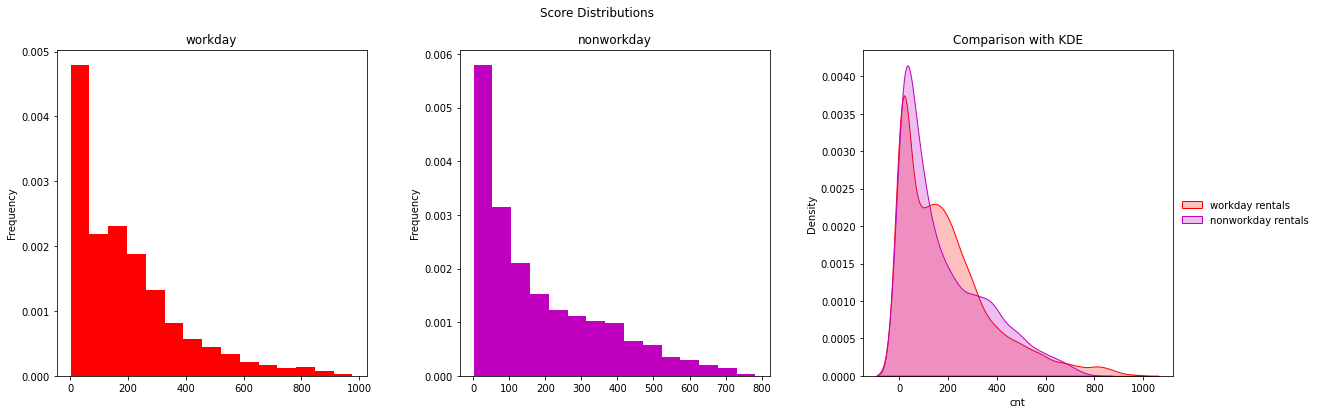

In [ ]:
#workday = np.log(df[df['workingday'] == 1]['cnt'])
#nonworkday = np.log(df[df['workingday'] == 0]['cnt'])

workday = df[df['workingday'] == 1]['cnt']
nonworkday = df[df['workingday'] == 0]['cnt']
fig, ax = plt.subplots(1, 3, figsize=(20,6))

workday.plot(kind="hist", ax=ax[0], bins=15, label="workday rentals", color="r", density=True)
ax[0].set_title("workday")

nonworkday.plot(kind="hist", ax=ax[1], bins=15, label="nonworkday rentals", color="m", density=True)
ax[1].set_title("nonworkday")

sns.kdeplot(workday, shade=True, label="workday rentals", ax=ax[2], color="r")
sns.kdeplot(nonworkday, shade=True, label="nonworkday rentals", ax=ax[2], color="m")
ax[2].set_title("Comparison with KDE")

plt.legend(loc='center left',
           bbox_to_anchor=(1, 0.5),
           frameon=False)
plt.suptitle("Score Distributions")
plt.subplots_adjust(wspace=0.3)
plt.show()

After the visualization we compared the two distributions by stating a null hypothesis "the average cnt is the same on workdays and nonworkdays" and an alternative hypothesis:"the average cnt is different on workdays and nonworkdays"

Then we used the T-test to decide if there is a significant relation between a day being workday and the daily count.

In [ ]:
alpha = 0.05
null_hypothesis = 'the average cnt is the same on workdays and nonworkdays'
alternative_hypothesis = 'the average cnt is different on workdays and nonworkdays'
confidence_interval = 95
equal_var = False

ttest = stats.ttest_ind(workday, nonworkday, equal_var=equal_var)
p = ttest.pvalue
t = ttest.statistic
print(ttest)
print('pvalue: ', p)
if p < alpha:
    print('reject null hypothesis, ', alternative_hypothesis)
else:
    print('accept null hypothesis, ', null_hypothesis)

Ttest_indResult(statistic=4.095067721524372, pvalue=4.249478377549546e-05)
pvalue:  4.249478377549546e-05
reject null hypothesis,  the average cnt is different on workdays and nonworkdays


## **Q2) Is there any significant difference between the means of bike rentals in winter and bike rentals in other seasons?**


We started by separating the dataframe as average count from winter and average count values from other seasons. These values are used after taking their logarithms.

In [ ]:
test_type = "cnt"

season1_cnts = np.log(df[df["season"] == 1][test_type])
season234_cnts = np.log(df[df["season"] != 1][test_type])

print(f"mean of log bike rentals in spring: {season1_cnts.mean():.2f}")
print(f"mean of log bike rentals in other seasons: {season234_cnts.mean():.2f}")

mean of log bike rentals in spring: 3.96
mean of log bike rentals in other seasons: 4.72


Then we sketched the plot of the two dataframes by using the frequency value of the count. After that we added an additional KDE graph to observe if there is a similarity.

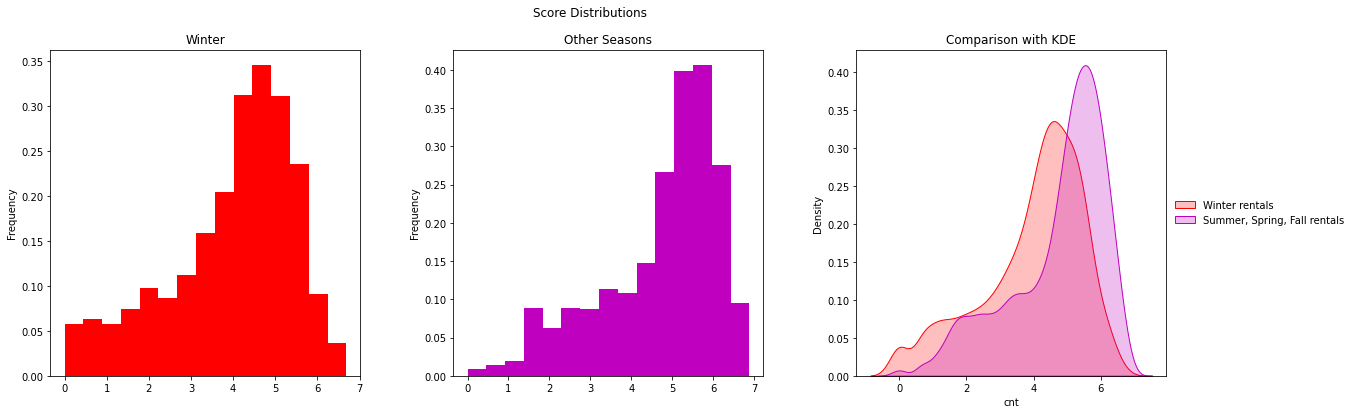

In [ ]:
fig, ax = plt.subplots(1, 3, figsize=(20,6))

season1_cnts.plot(kind="hist", ax=ax[0], bins=15, label="Winter", color="r", density=True)
ax[0].set_title("Winter")

season234_cnts.plot(kind="hist", ax=ax[1], bins=15, label="Summer, Spring, Fall rentals", color="m", density=True)
ax[1].set_title("Other Seasons")

sns.kdeplot(season1_cnts, shade=True, label="Winter rentals", ax=ax[2], color="r")
sns.kdeplot(season234_cnts, shade=True, label="Summer, Spring, Fall rentals", ax=ax[2], color="m")
ax[2].set_title("Comparison with KDE")

plt.legend(loc='center left',
           bbox_to_anchor=(1, 0.5),
           frameon=False)
plt.suptitle("Score Distributions")
plt.subplots_adjust(wspace=0.3)
plt.show()

In [ ]:
stats.ttest_ind(season1_cnts, season234_cnts, equal_var=False)

Ttest_indResult(statistic=-29.195010910367746, pvalue=9.69500417476514e-177)

test score is negative meaning the mean of cnt in winter is less than cnt in summer, also p-value is \<0.05 \(our significance value\)  hence the null hypothesis is rejected. This means that the difference in distribution is significant and cnt in winter is less than the mean of cnt in summer since test score is negative too.

##Q2.5) Does seasons have an effect on count value?


Then we conducted a hypothesis test to find if there is a significant difference between the count values of seasons. To test this we divided the dataframe into four parts depending on the season.

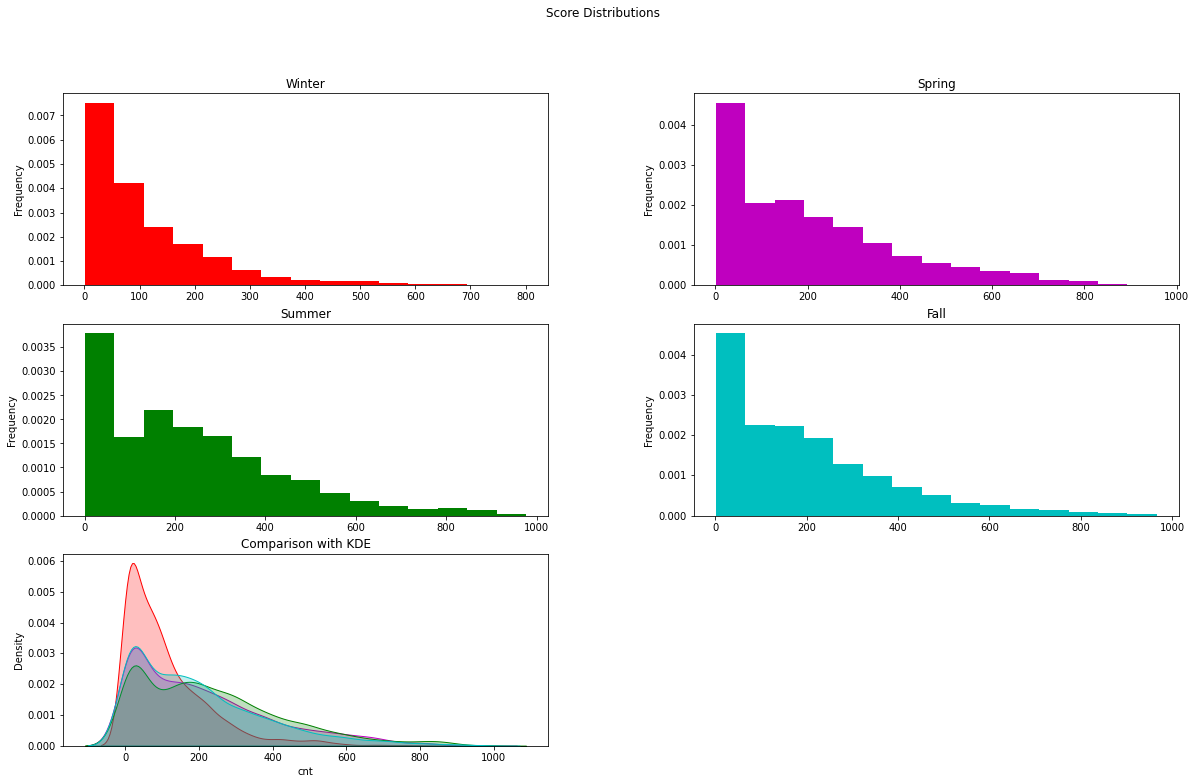

In [ ]:
season1 = df[df['season'] == 1]['cnt']
season2 = df[df['season'] == 2]['cnt']
season3 = df[df['season'] == 3]['cnt']
season4 = df[df['season'] == 4]['cnt']

fig, ax = plt.subplots(3, 2, figsize=(20,12))

season1.plot(kind="hist", ax=ax[0,0], bins=15, label="Winter", color="r", density=True)
ax[0,0].set_title("Winter")

season2.plot(kind="hist", ax=ax[0,1], bins=15, label="Spring", color="m", density=True)
ax[0,1].set_title("Spring")

season3.plot(kind="hist", ax=ax[1,0], bins=15, label="Summer", color="g", density=True)
ax[1,0].set_title("Summer")

season4.plot(kind="hist", ax=ax[1,1], bins=15, label="Fall", color="c", density=True)
ax[1,1].set_title("Fall")

sns.kdeplot(season1, shade=True, label="Winter", ax=ax[2,0], color="r")
sns.kdeplot(season2, shade=True, label="Spring", ax=ax[2,0], color="m")
sns.kdeplot(season3, shade=True, label="Summer", ax=ax[2,0], color="g")
sns.kdeplot(season4, shade=True, label="Fall", ax=ax[2,0], color="c")
ax[2,0].set_title("Comparison with KDE")

ax[2,1].axis('off')


plt.suptitle("Score Distributions")
plt.subplots_adjust(wspace=0.3)
plt.show()

After visulizing the dataframes by using the frequency values for each season we used a KDE graph to compare the frequencies. Then we chose a null hypothesis that claims the mean count values of seasons are not significantly different and we found an alternative hypothesis that claims the opposite. Lastly, we conducted the T-test with the p-value.

In [ ]:
# Test the hypothesis that the mean bike rental count is the same across seasons


stat, pvalue = stats.f_oneway(season1, season2, season3, season4)

if pvalue < 0.05:
  print("The means of the seasons are significantly different.")
else:
  print("The means of the seasons are not significantly different.")

The means of the seasons are significantly different.


##Q3) Does weekday-weekend difference have a significant effect over count values?



Weekdays and weekends are tested for a correlation with the average count number. We started by dividing the datframe into two seperate dataframe one of them includes the weekdays and the second one includes weekends and their average count values.

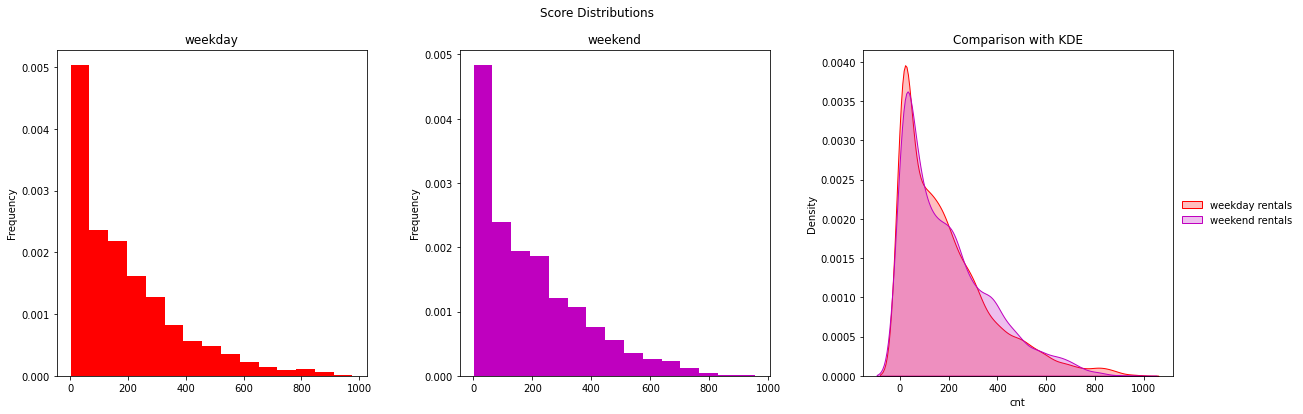

In [ ]:
weekday = df[df['weekday'] < 5]['cnt']
weekend = df[df['weekday'] >= 5]['cnt']
fig, ax = plt.subplots(1, 3, figsize=(20,6))

weekday.plot(kind="hist", ax=ax[0], bins=15, label="weekday rentals", color="r", density=True)
ax[0].set_title("weekday")

weekend.plot(kind="hist", ax=ax[1], bins=15, label="weekend rentals", color="m", density=True)
ax[1].set_title("weekend")

sns.kdeplot(weekday, shade=True, label="weekday rentals", ax=ax[2], color="r")
sns.kdeplot(weekend, shade=True, label="weekend rentals", ax=ax[2], color="m")
ax[2].set_title("Comparison with KDE")

plt.legend(loc='center left',
           bbox_to_anchor=(1, 0.5),
           frameon=False)
plt.suptitle("Score Distributions")
plt.subplots_adjust(wspace=0.3)
plt.show()

Secondly, the average count values for each dataset is displayed using a frequency value. After doing that we found a null hypothesis that claims there is no sinificant difference between the average count of weekdays and weekends. Lastly we chose an alternative hypothesis and conducted a T-test.

In [ ]:
alpha = 0.05
null_hypothesis = 'the average cnt is the same on weekdays and weekend'
alternative_hypothesis = 'the average cnt is different on weekdays and weekend'
confidence_interval = 95
equal_var = False

ttest = stats.ttest_ind(weekday, weekend, equal_var=equal_var)
p = ttest.pvalue
t = ttest.statistic
#get degrees of freedom of ttest
print(ttest)
print('pvalue: ', p)
if p < alpha:
    print('reject null hypothesis, ', alternative_hypothesis)
else:
    print('accept null hypothesis, ', null_hypothesis)

Ttest_indResult(statistic=-1.7313730032851584, pvalue=0.08341761082356651)
pvalue:  0.08341761082356651
accept null hypothesis,  the average cnt is the same on weekdays and weekend


In [ ]:
weekday = df[df['weekday'] < 5]['cnt']
weekend = df[df['weekday'] >= 5]['cnt']

stat, pvalue = stats.ks_2samp(weekend, weekday)
print(pvalue)
if pvalue < 0.05:
  print("The distributions of bike rentals on weekends and weekdays are significantly different.")
else:
  print("The distributions of bike rentals on weekends and weekdays are not significantly different.")

0.0007024286887499343
The distributions of bike rentals on weekends and weekdays are significantly different.


##Q3.3) Does before-after midday difference affect count value?

In our third hypothesis test we tested the significanse of before midday and after midday rentals. We devided the dataframe into two seperate dataframes using the hour column.

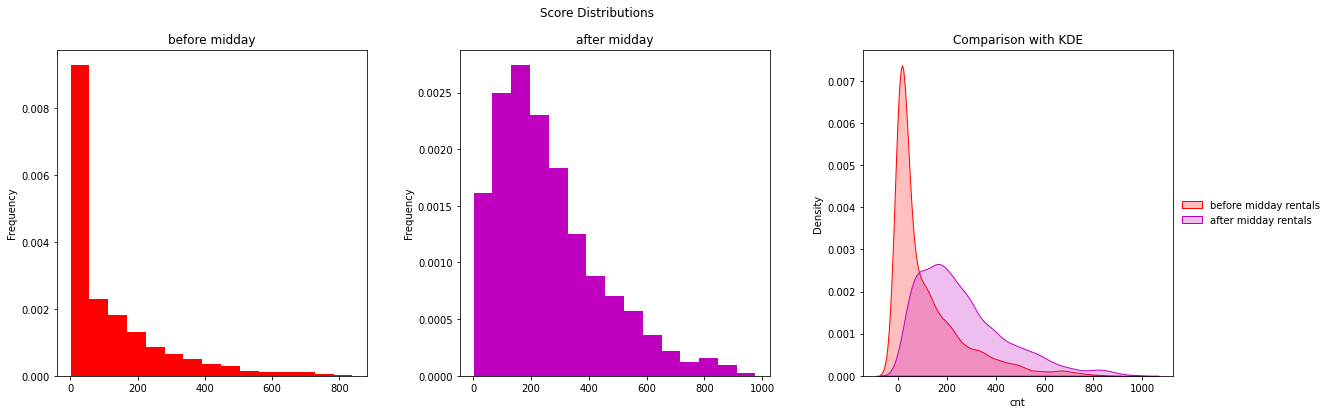

In [ ]:
before12 = df[df['hr'] < 12]['cnt']
after12 = df[df['hr'] >= 12]['cnt']
fig, ax = plt.subplots(1, 3, figsize=(20,6))

before12.plot(kind="hist", ax=ax[0], bins=15, label="before midday rentals", color="r", density=True)
ax[0].set_title("before midday")

after12.plot(kind="hist", ax=ax[1], bins=15, label="after midday rentals", color="m", density=True)
ax[1].set_title("after midday")

sns.kdeplot(before12, shade=True, label="before midday rentals", ax=ax[2], color="r")
sns.kdeplot(after12, shade=True, label="after midday rentals", ax=ax[2], color="m")
ax[2].set_title("Comparison with KDE")

plt.legend(loc='center left',
           bbox_to_anchor=(1, 0.5),
           frameon=False)
plt.suptitle("Score Distributions")
plt.subplots_adjust(wspace=0.3)
plt.show()

After visualizing the data using the frequency values we chose a null hypothesis that claim there is no significant difference between the before and after midday count values. Using the null hypothesis and the alternative hypothesis we conducted the T-test.

In [ ]:
alpha = 0.05
null_hypothesis = 'the average cnt is the same before midday and after midday'
alternative_hypothesis = 'the average cnt is before midday and after midday'
confidence_interval = 95
equal_var = False

ttest = stats.ttest_ind(before12, after12, equal_var=equal_var)
p = ttest.pvalue
t = ttest.statistic
#get degrees of freedom of ttest
print(ttest)
print('pvalue: ', p)
if p < alpha:
    print('reject null hypothesis, ', alternative_hypothesis)
else:
    print('accept null hypothesis, ', null_hypothesis)

Ttest_indResult(statistic=-56.72611374935855, pvalue=0.0)
pvalue:  0.0
reject null hypothesis,  the average cnt is before midday and after midday


##Q3.6) Does working hours and non-working hours on working days have a significant effect on count value?

We conducted a T-test to decide if there is a significant difference between the average count value during and after working hours. We divided the dataframe into two parts depending on the hour value being in [8,17] interval or not. However we only took the working days to consideration. Then we plotted a bar chart for each dataframe and an additional graph to compare frequency values of the two dataframes.

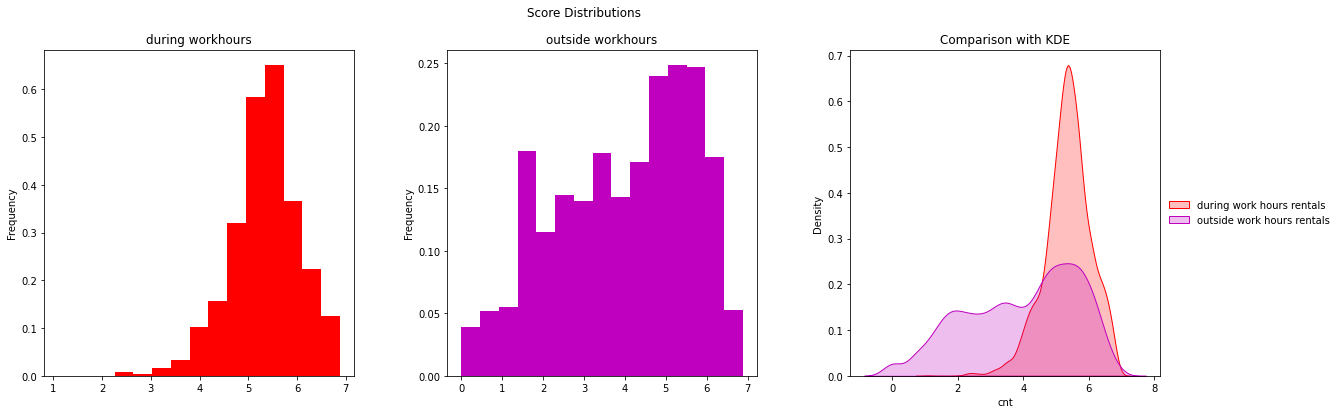

In [ ]:
#duringwork= df[df['workingday'] == 1]
duringwork= np.log(df[(((df['hr'] >= 8) & (df['hr'] <= 17)) & (df['workingday'] == 1))]['cnt'])
#outsidework = df[df['workingday'] == 0]
outsidework = np.log( df[ (( (df['hr'] < 8) | (df['hr'] > 17) ) & (df['workingday'] == 1))]['cnt'])
fig, ax = plt.subplots(1, 3, figsize=(20,6))

duringwork.plot(kind="hist", ax=ax[0], bins=15, label="during work hours rentals", color="r", density=True)
ax[0].set_title("during workhours")

outsidework.plot(kind="hist", ax=ax[1], bins=15, label="outside work hours rentals", color="m", density=True)
ax[1].set_title("outside workhours")

sns.kdeplot(duringwork, shade=True, label="during work hours rentals", ax=ax[2], color="r")
sns.kdeplot(outsidework, shade=True, label="outside work hours rentals", ax=ax[2], color="m")
ax[2].set_title("Comparison with KDE")

plt.legend(loc='center left',
           bbox_to_anchor=(1, 0.5),
           frameon=False)
plt.suptitle("Score Distributions")
plt.subplots_adjust(wspace=0.3)
plt.show()

After visualizing the data we chose our null hypothesis as: "the average cnt is the same inside and outside of work hours in workdays" and the alternative hypothesis as: "the average cnt is the not the same inside and outside of work hours in workdays"

Then we conducted the T-test with the p-value



In [ ]:
alpha = 0.05
null_hypothesis = 'the average cnt is the same inside and outside of work hours in workdays'
alternative_hypothesis = 'the average cnt is the not the same inside and outside of work hours in workdays'
confidence_interval = 95
equal_var = False

ttest = stats.ttest_ind(duringwork, outsidework, equal_var=equal_var)
p = ttest.pvalue
t = ttest.statistic
#get degrees of freedom of ttest
print(ttest)
print('pvalue: ', p)
if p < alpha:
    print('reject null hypothesis, ', alternative_hypothesis)
else:
    print('accept null hypothesis, ', null_hypothesis)

Ttest_indResult(statistic=60.99305427820076, pvalue=0.0)
pvalue:  0.0
reject null hypothesis,  the average cnt is the not the same inside and outside of work hours in workdays


##Q3.9) Additional test for working  and non-working hours including non-working days?

We proceded by comparing the working hours to other time intervals for every day. In the previous hypothesis we did the same thing for working days but we decided to check the same test with the average count of every day. So we started by grouping the data with the time intervals [8,17] and the rest of the day.

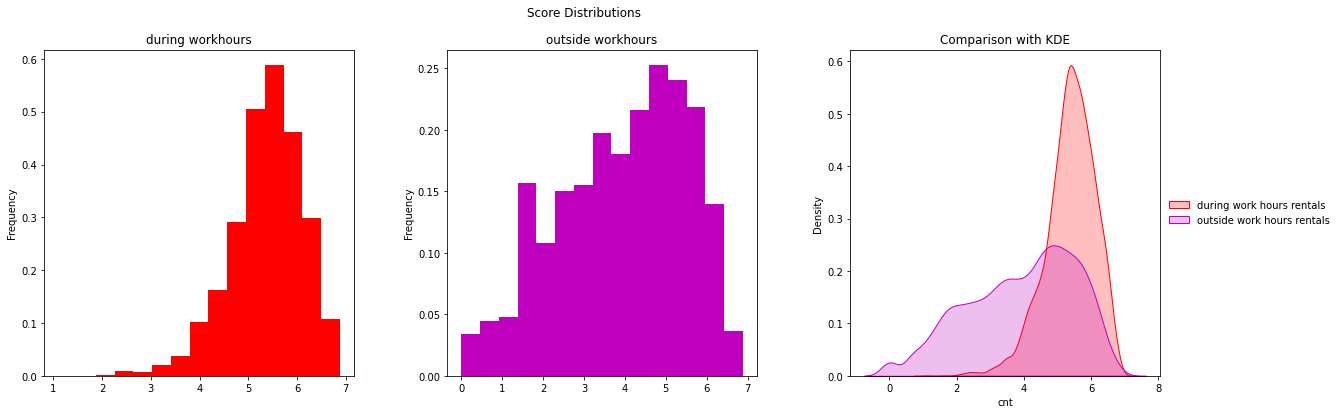

In [ ]:
#duringwork= df[df['workingday'] == 1]
duringwork= np.log(df[((df['hr'] >= 8) & (df['hr'] <= 17)) ]['cnt'])
#outsidework = df[df['workingday'] == 0]
outsidework = np.log( df[ ( (df['hr'] < 8) | (df['hr'] > 17) ) ]['cnt'])
fig, ax = plt.subplots(1, 3, figsize=(20,6))

duringwork.plot(kind="hist", ax=ax[0], bins=15, label="during work hours rentals", color="r", density=True)
ax[0].set_title("during workhours")

outsidework.plot(kind="hist", ax=ax[1], bins=15, label="outside work hours rentals", color="m", density=True)
ax[1].set_title("outside workhours")

sns.kdeplot(duringwork, shade=True, label="during work hours rentals", ax=ax[2], color="r")
sns.kdeplot(outsidework, shade=True, label="outside work hours rentals", ax=ax[2], color="m")
ax[2].set_title("Comparison with KDE")

plt.legend(loc='center left',
           bbox_to_anchor=(1, 0.5),
           frameon=False)
plt.suptitle("Score Distributions")
plt.subplots_adjust(wspace=0.3)
plt.show()

We visualized the data by plotting the two dataframes with their frequency values. Then we created an additional KDE graph to see if the distributions are related.

After the visualizations we chose a null hypothesis "the average cnt is the same inside and outside of work hours in all days"
and an alternative hypothesis:"the average cnt is not the same inside and outside of work hours in all days". Then we used the T-test to check if there is a significant relation between the two parameters.

In [ ]:
alpha = 0.05
null_hypothesis = 'the average cnt is the same inside and outside of work hours in all days'
alternative_hypothesis = 'the average cnt is the the same inside and outside of work hours in all days'
confidence_interval = 95
equal_var = False

ttest = stats.ttest_ind(duringwork, outsidework, equal_var=equal_var)
p = ttest.pvalue
t = ttest.statistic
print(ttest)
print('pvalue: ', p)
if p < alpha:
    print('reject null hypothesis, ', alternative_hypothesis)
else:
    print('accept null hypothesis, ', null_hypothesis)

Ttest_indResult(statistic=80.2614320046945, pvalue=0.0)
pvalue:  0.0
reject null hypothesis,  the average cnt is the the same inside and outside of work hours in all days


##Q4) Does weather situation(weathersit) affect count value?

Weather situation and average count number is tested for correlation using the T-test. First, the data is divided into two dataframes. First dataframe is seperated to show the count numbers for each season and the second one is divided to show the average count number for each weather condition.

In [ ]:
Dict_Season = {1:'Winter', 2:'Spring', 3:'Summer', 4:'Fall'}
Dict_WeatherCond = {1:'Clear', 2:'Mist and Few Clouds', 3:'Light Snow and Rain', 4:'Heavy Snow and Rain'}

df_for_this = df.copy()
df_for_this['season'] = df_for_this['season'].map(Dict_Season)
df_for_this['weathersit'] = df_for_this['weathersit'].map(Dict_WeatherCond)

Then the data is visualized using two bar charts. First bar chart shows the average count value for every season and the second one shows the average count value for every weather condition.

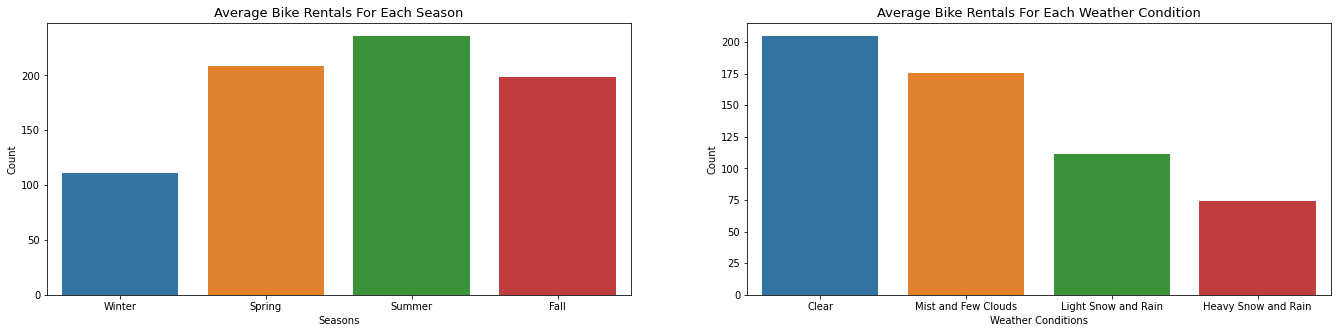

In [ ]:
import seaborn as sns

fig,ax = plt.subplots(1,2,figsize=(23, 5))
sns.barplot(x='season', y='cnt', data=df_for_this,ci=None,ax=ax[0])
ax[0].set_title("Average Bike Rentals For Each Season",fontsize=13)
ax[0].set_ylabel("Count")
ax[0].set_xlabel("Seasons")

sns.barplot(x='weathersit', y='cnt', data=df_for_this,ci=None,ax=ax[1])
ax[1].set_title("Average Bike Rentals For Each Weather Condition",fontsize=13)
ax[1].set_ylabel("Count")
ax[1].set_xlabel("Weather Conditions")
plt.show()

*   Bike rental in summer is higher than in other seasons. After summer, the highest number of bike rentals is in spring, then fall and lastly in winter.
*   Bike rentals are lowest in heavy snow and rain weather condition. On the other hand, bike rentals are highest in clear weather condition.



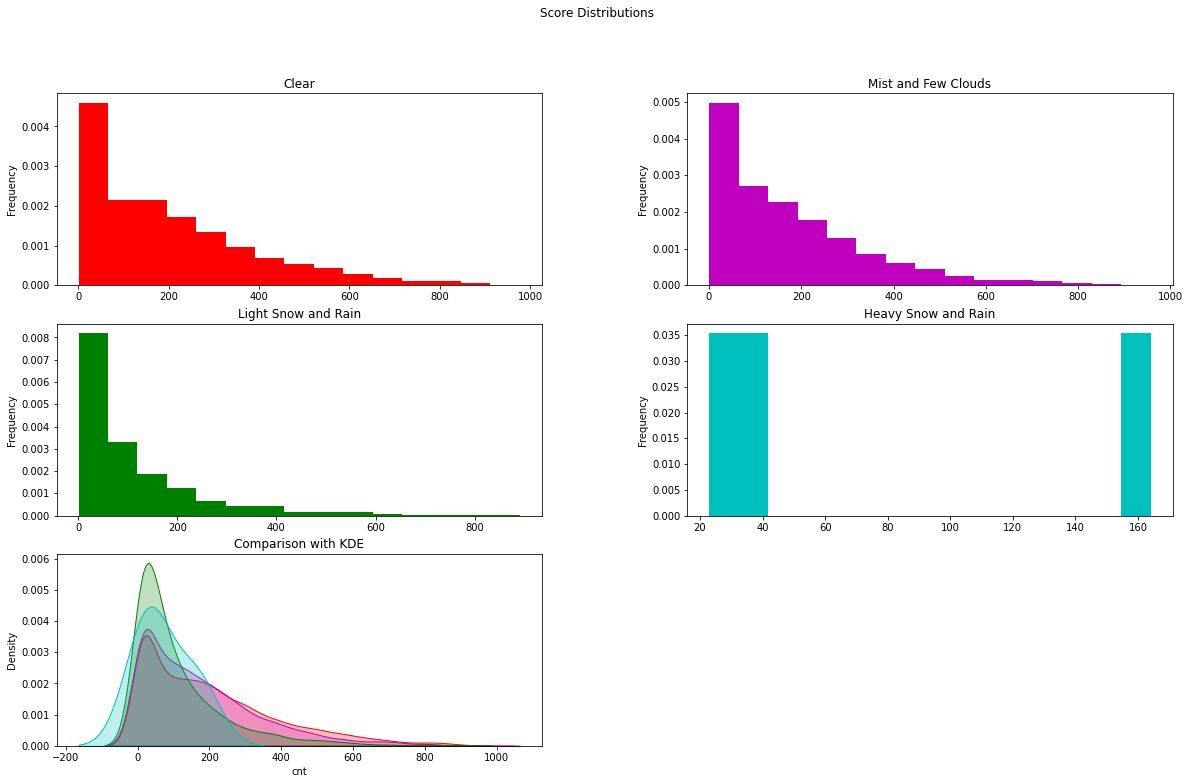

In [ ]:
weathersit1 = df_for_this[df_for_this['weathersit'] == 'Clear']['cnt']
weathersit2 = df_for_this[df_for_this['weathersit'] == 'Mist and Few Clouds']['cnt']
weathersit3 = df_for_this[df_for_this['weathersit'] == 'Light Snow and Rain']['cnt']
weathersit4 = df_for_this[df_for_this['weathersit'] == 'Heavy Snow and Rain']['cnt']

fig, ax = plt.subplots(3, 2, figsize=(20,12))

weathersit1.plot(kind="hist", ax=ax[0,0], bins=15, label="Clear", color="r", density=True)
ax[0,0].set_title("Clear")

weathersit2.plot(kind="hist", ax=ax[0,1], bins=15, label="Mist and Few Clouds", color="m", density=True)
ax[0,1].set_title("Mist and Few Clouds")

weathersit3.plot(kind="hist", ax=ax[1,0], bins=15, label="Light Snow and Rain", color="g", density=True)
ax[1,0].set_title("Light Snow and Rain")

weathersit4.plot(kind="hist", ax=ax[1,1], bins=15, label="Heavy Snow and Rain", color="c", density=True)
ax[1,1].set_title("Heavy Snow and Rain")

sns.kdeplot(weathersit1, shade=True, label="Clear", ax=ax[2,0], color="r")
sns.kdeplot(weathersit2, shade=True, label="Mist and Few Clouds", ax=ax[2,0], color="m")
sns.kdeplot(weathersit3, shade=True, label="Light Snow and Rain", ax=ax[2,0], color="g")
sns.kdeplot(weathersit4, shade=True, label="Heavy Snow and Rain", ax=ax[2,0], color="c")
ax[2,0].set_title("Comparison with KDE")

ax[2,1].axis('off')


plt.suptitle("Score Distributions")
plt.subplots_adjust(wspace=0.3)
plt.show()

 After individually graphing every weathersit we combined them using a KDE graph. Then we chose a null hypothesis that claims the 4 weather conditions are not significantly different and we also chose an alternative hypothesis that claims the opposite. Lastly we conducted a T-test and showed that the null hypothesis is false.

In [ ]:
# Test the hypothesis that the average bike rental count is the same across different weather conditions


stat, pvalue = stats.f_oneway(weathersit1, weathersit2, weathersit3, weathersit4)

if pvalue < 0.05:
  print("The averages of the weather conditions are significantly different.")
else:
  print("The averages of the weather conditions are not significantly different.")

The averages of the weather conditions are significantly different.


##Q5-6) Is there a significant relation between the average count value and humidity-temperature levels?

Average count values are tested for correlation with the temperature and humidity levels.

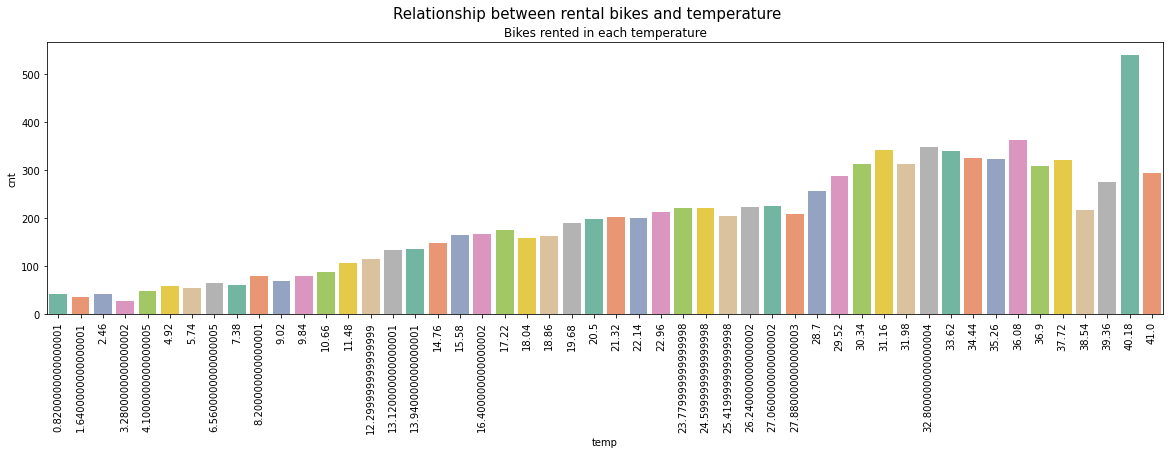

In [ ]:
fig, axs = plt.subplots(1, figsize=(20,5))
sns.barplot(x=df['temp']*41, y=df['cnt'], ax=axs,ci = None, palette = 'Set2')
axs.set_title('Bikes rented in each temperature')
fig.suptitle('Relationship between rental bikes and temperature', fontsize = 15)
plt.xticks(rotation=90)
plt.subplots_adjust(hspace=0.5)


In this bar chart temperature and the average count values are displayed. It is seen that 28 degrees celsius is a critical value and average count starts to increase after that point

In the hypothesis testing part we wanted to find out if there is a correlation between the temperature values and the average count number. In order to do that, we seperated our innitial dataset into two. The first one is the average count numbers for temperaturesless than or equal to 28 and the second one includes the temperatures greater than 28. Then we visualized each dataset seperatly by showing the frequency values for each temperature.

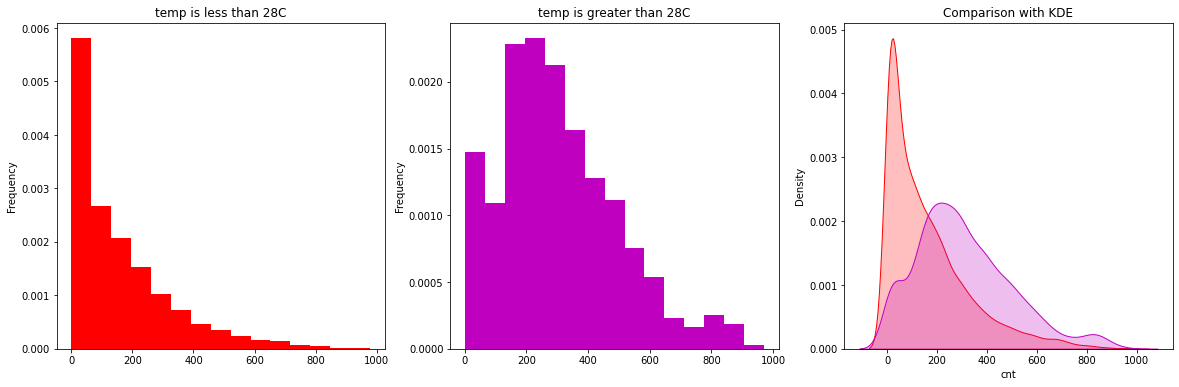

In [ ]:
lessthan28 = df[df['temp']*41 <= 28]['cnt']
greaterthan28 = df[df['temp']*41 > 28]['cnt']
fig, ax = plt.subplots(1, 3, figsize=(20,6))

lessthan28.plot(kind="hist", ax=ax[0], bins=15, label="when temp is less than 28C", color="r", density=True)
ax[0].set_title("temp is less than 28C")

greaterthan28.plot(kind="hist", ax=ax[1], bins=15, label="when temp is greater than 28C", color="m", density=True)
ax[1].set_title("temp is greater than 28C")

sns.kdeplot(lessthan28, shade=True, label="temp is less than 28C", ax=ax[2], color="r")
sns.kdeplot(greaterthan28, shade=True, label="temp is greater than 28C", ax=ax[2], color="m")
ax[2].set_title("Comparison with KDE")
plt.show()

Lastly we used a T test to show that there is a correlation between these two values. We used a null hypothesis that claims temperature and count values are not correlated then we chose an alternative hypothesis that claims the opposite.

In [ ]:
alpha = 0.05
null_hypothesis = 'the average cnt is the same when temp is less than or greater than 28'
alternative_hypothesis = 'the average cnt increases with the temperature'
confidence_interval = 95
equal_var = False
ttest = stats.ttest_ind(lessthan28, greaterthan28, equal_var=equal_var)
p = ttest.pvalue
t = ttest.statistic
#get degrees of freedom of ttest
print(ttest)
print('pvalue: ', p)
if p < alpha:
    print('reject null hypothesis, ', alternative_hypothesis)
else:
    print('accept null hypothesis, ', null_hypothesis)

Ttest_indResult(statistic=-40.298234386759184, pvalue=7.355118459750461e-305)
pvalue:  7.355118459750461e-305
reject null hypothesis,  the average cnt increases with the temperature


Humidity

To find out if there is a correlation between humidity and average count value we used a similar strategy. First we displayed the data in the same way we displayed the temperature data. Then we found a critical point where the average count value starts to increase. So we divided the dataframe into two parts using this critical datapoint.

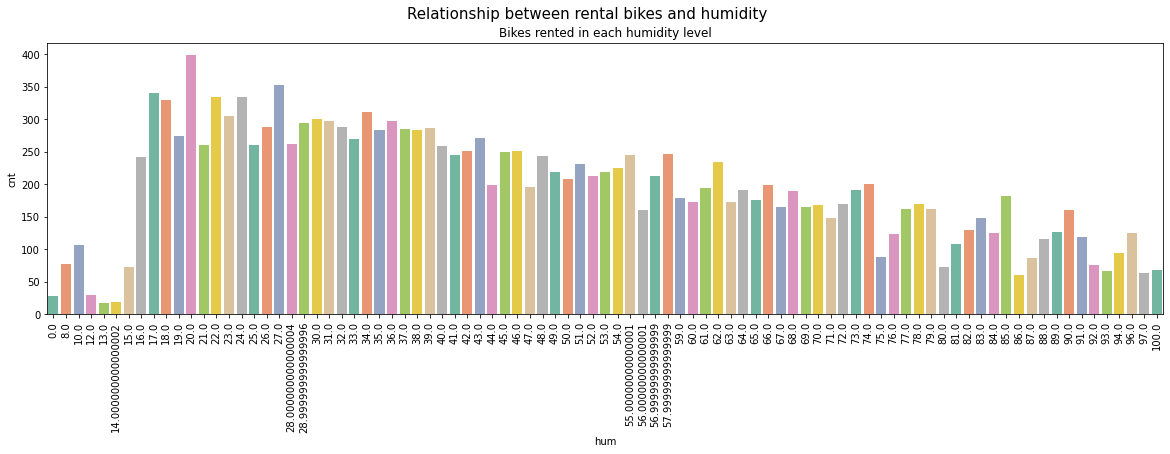

In [ ]:
fig, axs = plt.subplots(1 ,figsize=(20,5))
sns.barplot(x=df['hum']*100, y=df['cnt'], ax=axs,ci = None, palette = 'Set2')
axs.set_title('Bikes rented in each humidity level')
fig.suptitle('Relationship between rental bikes and humidity', fontsize = 15)
plt.xticks(rotation=90)
plt.subplots_adjust(hspace=0.5)
plt.show()

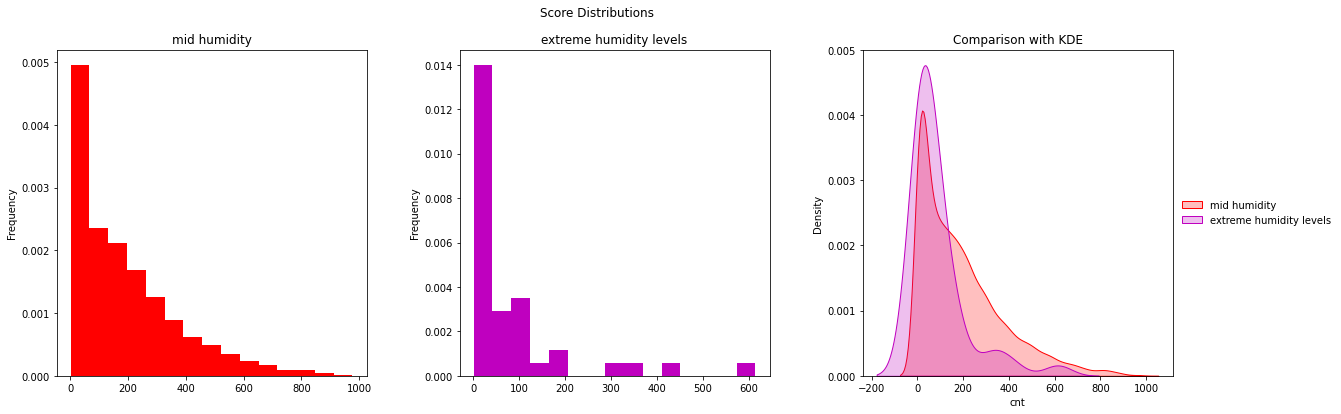

In [ ]:
mid_humid = df[df['hum']*100>17]['cnt']
extreme_hum_level= df[df['hum']*100<=16]['cnt']
fig, ax = plt.subplots(1, 3, figsize=(20,6))

mid_humid.plot(kind="hist", ax=ax[0], bins=15, label="mid humidity", color="r", density=True)
ax[0].set_title("mid humidity")

extreme_hum_level.plot(kind="hist", ax=ax[1], bins=15, label="extreme humidity levels", color="m", density=True)
ax[1].set_title("extreme humidity levels")

sns.kdeplot(mid_humid, shade=True, label="mid humidity", ax=ax[2], color="r")
sns.kdeplot(extreme_hum_level, shade=True, label="extreme humidity levels", ax=ax[2], color="m")
ax[2].set_title("Comparison with KDE")

plt.legend(loc='center left',
           bbox_to_anchor=(1, 0.5),
           frameon=False)
plt.suptitle("Score Distributions")
plt.subplots_adjust(wspace=0.3)
plt.show()

After visualizing the dataframes using the frequency values, we chose a null hypothesis that claims there is no correlation between humidity and count values. Then we found an alternative hypothesis that claims the contrary.

In [ ]:
alpha = 0.05
null_hypothesis = 'the average cnt is the same when hum is less than or greater than 17'
alternative_hypothesis = 'the average cnt increases with the hum'
confidence_interval = 95
equal_var = False

ttest = stats.ttest_ind(mid_humid, extreme_hum_level, equal_var=equal_var)
p = ttest.pvalue
t = ttest.statistic
print(ttest)
print('pvalue: ', p)
if p < alpha:
    print('reject null hypothesis, ', alternative_hypothesis)
else:
    print('accept null hypothesis, ', null_hypothesis)

Ttest_indResult(statistic=5.326425054787941, pvalue=3.8034119725911258e-06)
pvalue:  3.8034119725911258e-06
reject null hypothesis,  the average cnt increases with the hum


## Machine Learning Models



In our project, we used 5 machine learning models these are linear regression, random forest, decision tree, XG boost, and k-NN. We have performed hyperparameter tuning and 5-fold cross validation on all our models and showcased their performances through data visualization. In the end we have displayed the most important feaures in our important models.



### Implementation




Training Linear Regression model...
Fitting 5 folds for each of 2 candidates, totalling 10 fits
Training Random Forest model...
Fitting 5 folds for each of 9 candidates, totalling 45 fits
Training Decision Tree model...
Fitting 5 folds for each of 3 candidates, totalling 15 fits
Training XGBoost model...
Fitting 5 folds for each of 27 candidates, totalling 135 fits
Training KNN model...
Fitting 5 folds for each of 3 candidates, totalling 15 fits
Linear Regression - MSE: 19925.402129180035 - R2: 0.4028787536036338
Random Forest - MSE: 1973.6678554660532 - R2: 0.9408534391332342
Decision Tree - MSE: 3713.421481529491 - R2: 0.8887167822726809
XGBoost - MSE: 1734.342851329566 - R2: 0.9480254923664542
KNN - MSE: 3138.018872266974 - R2: 0.9059603551248135


,Model Name,Best Parameters,Best Score,MSE,R2
0,Linear Regression,{'fit_intercept': True},0.384093,19925.402129,0.402879
1,Random Forest,"{'max_depth': None, 'n_estimators': 25}",0.940055,1973.667855,0.940853
2,Decision Tree,{'max_depth': 10},0.890249,3713.421482,0.888717
3,XGBoost,"{'learning_rate': 0.2, 'max_depth': 10, 'n_estimators': 25}",0.947431,1734.342851,0.948025
4,KNN,{'n_neighbors': 5},0.903698,3138.018872,0.905960


<Figure size 1440x2160 with 0 Axes>

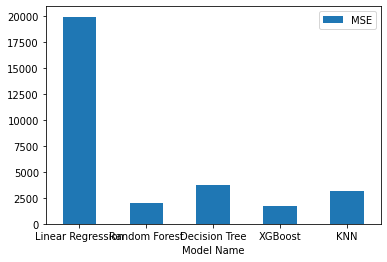

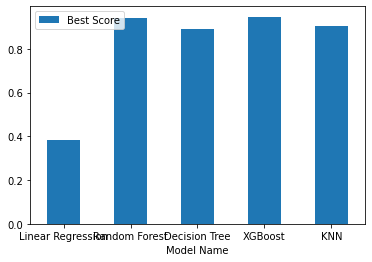

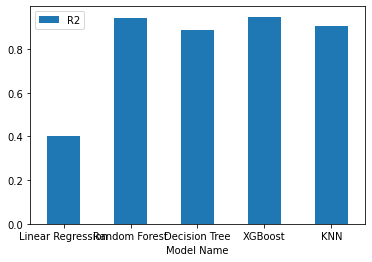

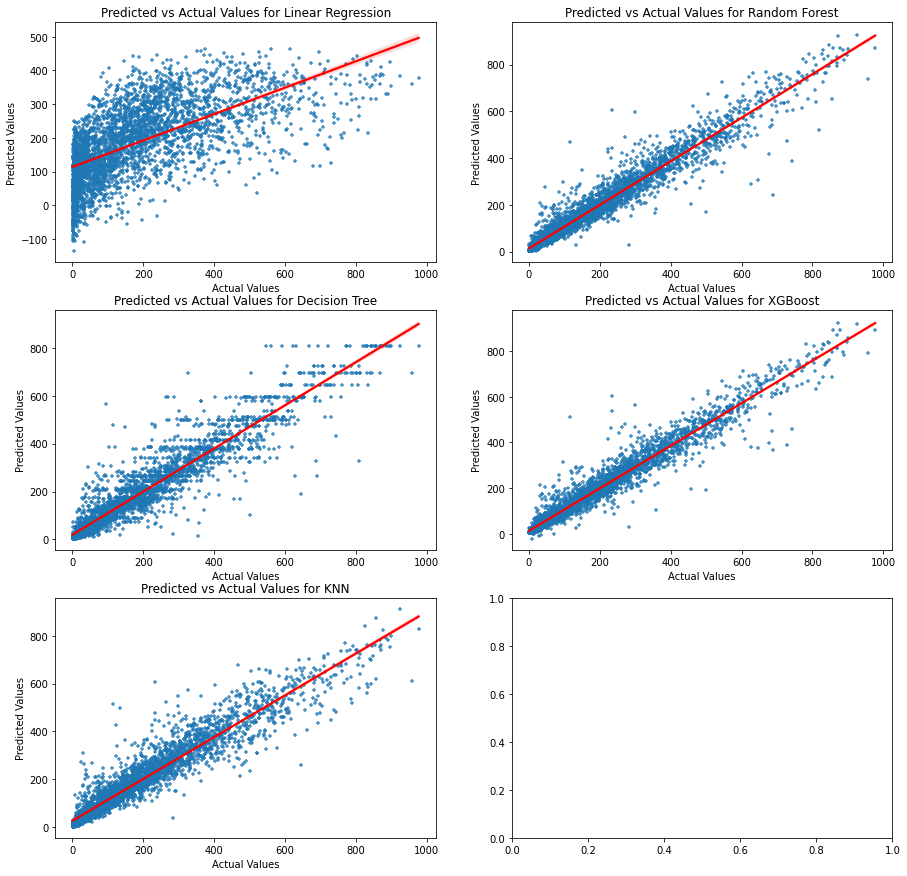

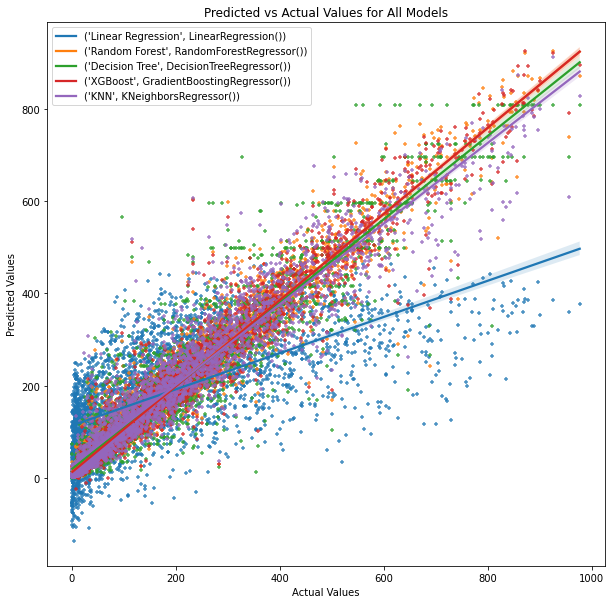

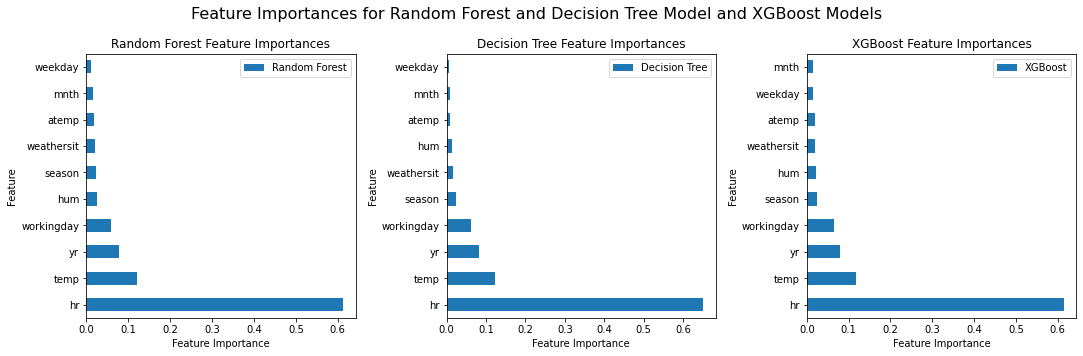

In [ ]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
#import XGBoost regressor and knn regressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.neighbors import KNeighborsRegressor

from sklearn.metrics import mean_squared_error, r2_score

X = df.drop(["cnt", "casual", "registered", "dteday"], axis=1)
y = df["cnt"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

#tested with and without scaler, not sure if this helps with this or not
#scaler = StandardScaler()
#X_train = scaler.fit_transform(X_train)
#X_test = scaler.transform(X_test)

#like this so can easily be done in one for loop
models = [
    ("Linear Regression", LinearRegression()),
    ("Random Forest", RandomForestRegressor()),
    ("Decision Tree", DecisionTreeRegressor()),
    #add an xgboost model here
    ("XGBoost", GradientBoostingRegressor()),
    #knn model here
    ("KNN", KNeighborsRegressor()),
]

# like this so can easily be used in gridsearch within one list
hyperparameters = [
    # hyperparameters for linearregression
    {"fit_intercept": [True, False]},
    # hyperparameters for randforsst
    {"n_estimators": [10, 20, 25], "max_depth": [None, 5, 10]},
    # hyperparameters for dectrees
    {"max_depth": [None, 5, 10]},
    # hyperparameters for xgboost
    {"n_estimators": [10, 20, 25], "max_depth": [None, 5, 10], "learning_rate": [0.1, 0.2, 0.3]},
    # hyperparameters for knn
    {"n_neighbors": [5, 10, 15]},
]

# print in a frame the parameters of each model



model_scores = []
ind = 0
for model_name, model in models:
    print(f"Training {model_name} model...")
    grid_search = GridSearchCV(model, hyperparameters[ind], cv=5, n_jobs=-1, verbose=1)
    #grid_search = GridSearchCV(model, hyperparameters, cv=5, scoring="neg_mean_squared_error")
    grid_search.fit(X_train, y_train)
    best_model = grid_search.best_estimator_
    #best_model = grid_search
    model_scores.append({"Model Name": model_name, "Best Parameters": grid_search.best_params_, "Best Score": grid_search.best_score_, "Best Model": best_model})
    ind+=1



for model_score in model_scores:
    model = model_score["Best Model"]
    y_pred = model.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    print(f"{model_score['Model Name']} - MSE: {mse} - R2: {r2}")

#show model_score["Model Name"] model_score["Best Parameters"] and model_score["Best Score"], mean squared error and r2 score in a table
info_frame = pd.DataFrame(model_scores)
info_frame = info_frame[["Model Name", "Best Parameters", "Best Score"]]
info_frame["MSE"] = [mean_squared_error(y_test, model_score["Best Model"].predict(X_test)) for model_score in model_scores]
info_frame["R2"] = [r2_score(y_test, model_score["Best Model"].predict(X_test)) for model_score in model_scores]
#make info_frame look nice
info_frame = info_frame.style.set_properties(**{'text-align': 'left'})
display(info_frame)

#plot the features of the models
info = pd.DataFrame(model_scores)
info = info[["Model Name", "Best Parameters", "Best Score"]]
info["MSE"] = [mean_squared_error(y_test, model_score["Best Model"].predict(X_test)) for model_score in model_scores]
info["R2"] = [r2_score(y_test, model_score["Best Model"].predict(X_test)) for model_score in model_scores]

plt.figure(figsize=(20,30))
ax1 = info.plot.bar(x='Model Name', y='MSE', rot=0)
ax2 = info.plot.bar(x='Model Name', y='Best Score', rot=0)
ax3 = info.plot.bar(x='Model Name', y='R2', rot=0)
plt.show()



#for model_score in model_scores:
#    sns.regplot(x=y_test, y=model_score["Best Model"].predict(X_test), fit_reg=True, scatter_kws={"s": 20}, line_kws={"color": "red"}, marker="+")
#    plt.title(f"Predicted vs Actual Values for {model_score['Model Name']}")
#    plt.xlabel("Actual Values")
#    plt.ylabel("Predicted Values")
#    plt.show()

#display the best model's predicted vs actual values in a single figure in different plot for each model
fig, ax = plt.subplots(3, 2, figsize=(15, 15))
ind = 0
for model_score, ax in zip(model_scores, ax.flatten()):
    if(ind == 5):

        ax.axis("off")
        break

    sns.regplot(x=y_test, y=model_score["Best Model"].predict(X_test), fit_reg=True, line_kws={"color": "red"}, scatter_kws={"s": 20}, marker="+", ax=ax)
    ax.set_title(f"Predicted vs Actual Values for {model_score['Model Name']}")
    ax.set_xlabel("Actual Values")
    ax.set_ylabel("Predicted Values")
    ind = ind + 1


plt.show()


fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(111)
for model_score in model_scores:
    #make the lines for each model different colors not just red
    sns.regplot(x=y_test, y=model_score["Best Model"].predict(X_test), fit_reg=True, scatter_kws={"s": 20}, marker="+", ax=ax)
    plt.title(f"Predicted vs Actual Values for All Models")
    #put a legend with respect to their line colors
    plt.legend([models[0], models[1], models[2], models[3], models[4]])

    plt.xlabel("Actual Values")
    plt.ylabel("Predicted Values")

plt.show()



#plot random forest and decisiontree feature importances in a single figure
ind = 0
fig, ax = plt.subplots(1, 3, figsize=(15, 5))
for model_score in model_scores:
    if model_score["Model Name"] == "Random Forest" or model_score["Model Name"] == "Decision Tree" or model_score["Model Name"] == "XGBoost":
        feature_importances = pd.Series(model_score["Best Model"].feature_importances_, index=X.columns)
        feature_importances.nlargest(10).plot(kind="barh", ax=ax[ind])
        ax[ind].set_title(model_score["Model Name"]+ " Feature Importances")
        ax[ind].set_xlabel("Feature Importance")
        ax[ind].set_ylabel("Feature")
        ax[ind].legend([model_score["Model Name"]])
        ind+=1

#make the fig look nice
fig.tight_layout()
fig.subplots_adjust(top=0.85)
fig.suptitle("Feature Importances for Random Forest and Decision Tree Model and XGBoost Models", fontsize=16)
fig.subplots_adjust(right=1)

plt.show()


### Results & Discussion

<font >
Firstly, we didn't use two separate counts of rented bikes as registered users' bike count and casual users' bike count. We used the combined value counts of these two as a total count (as it was given in the dataset) and used them in our machine learning section. Also, for each model, we used hyperparameter tunning. Furthermore, we compared these 5 models according to some variables, such that MSE(mean square error), and R^2. In addition, to recognize the best model in 5 options, we created a variable that is "best score", according to this variable we can compare models easily. In the first table, we can surely say that the highest error rate belongs to the linear regression model, indicating that data points are dispersed widely around its mean. Thus, the rate of MSE has to be minimum to get better results. So, in the table, the XG boots model gives the lowest mean square error rate. When we look at the results of models with the second variable which is R^2(coefficient of determination), we interpret this measure to give a piece of information about the goodness of fit of a model. High R^2 tells us that the regression line approximates the data points. Hence, the XG boots model performs better since it has the highest R^2 result. To have a precise decision about the best model to choose as we can look at the graph that includes scores of 5 models, which are aligned from the best to worst as XG boost, random forest, k-NN, decision tree, and linear regression. In addition, we added graphs that show the parameters such that predicted values, actual values, and performance of each model. Also, there is an inclusive graph that shows all models with the same parameters. Thus, we can observe that the linear regression model is not efficient. Lastly, we added the feature importance parameter of the first three models which are XG boost, random forest and k-NN. As we know, feature importance indicates how much each feature in our data set contributes to our model prediction. So, we can easily say that feature with high importance has an important degree of usefulness for the model. In our results, the hour is the most important feature for each top three models. Nevertheless, the alignment of importance is not the same between these three models. At the end the best model that represent our data is XG boost model.
</font>

## Conclusion

<font>
By conducting exploratory data analysis and implementing suitable machine learning models, we were able to interpret our findings and analyzed how seasonal and environmental features affect the bike sharing system usage trends. According to different parameters, bike sharing counts were predicted and feature importances were compared with each other. Our contributions to bike sharing system is crucial due to our sufficient accuracy rates. Our proposed solution and findings can be considered as applicable. On the other hand, accuracy rates can be improved or machine learning models can be enhanced. We have shown that the number of bike rentals is highly dependent on time, followed by the perceived temperature. 'XGBoost' and 'Random Forest' are suitable and preferable machine learning models for our data because by performing these models our system reached better regression results. Interactions between distinct variables were observed and relevant comparisons were drawn. In addition, best parameters, best scores, MSE values and R^2 values were calculated.


</font>


## Future Work
<font>
In terms of future works, by taking this project as a starting point, enhancements and improvements can be made in the accuracy rates, new machine learning models can be implemented. Also, bike sharing data which are taken from other countries or cities can be used to enrich the content of this project. Extra variables (such as years, months or whether the bike users are registered or not etc.) and different parameters can be used other than the variables and parameters which we have used. Moreover, the same project can be designed according to larger datasets. Different hypotheses about our bike sharing regression project can be formed and validated. Also, more machine learning algorithms can be implemented and the rate of convergence to the best/optimum result can be increased/maximized.



</font>

</font>